In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import xlrd

In [2]:
xlsx = pd.ExcelFile('KPMG_clean_data.xlsx')
df = pd.read_excel(xlsx, 'ExistingCustomerList')
transactions = pd.read_excel(xlsx, 'Transactions')
new_customers = pd.read_excel(xlsx, 'NewCustomerList')

In [3]:
#merge transactions with df to get a better picture of the data
df = df.merge(transactions, how='outer', on='customer_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20510 entries, 0 to 20509
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20510 non-null  int64         
 1   first_name                           20495 non-null  object        
 2   last_name                            19840 non-null  object        
 3   gender                               20495 non-null  object        
 4   past_3_years_bike_related_purchases  20495 non-null  float64       
 5   job_title                            18018 non-null  object        
 6   job_industry_category                17171 non-null  object        
 7   wealth_segment                       20495 non-null  object        
 8   deceased_indicator                   20495 non-null  float64       
 9   owns_car                             20495 non-null  float64       
 10  tenure    

In [4]:
df.head().T

,0,1,2,3,4
customer_id,1,1,1,1,1
first_name,Laraine,Laraine,Laraine,Laraine,Laraine
last_name,Medendorp,Medendorp,Medendorp,Medendorp,Medendorp
gender,Female,Female,Female,Female,Female
past_3_years_bike_related_purchases,93,93,93,93,93
job_title,Executive Secretary,Executive Secretary,Executive Secretary,Executive Secretary,Executive Secretary
job_industry_category,Health,Health,Health,Health,Health
wealth_segment,Mass Customer,Mass Customer,Mass Customer,Mass Customer,Mass Customer
deceased_indicator,0,0,0,0,0
owns_car,1,1,1,1,1


# CATEGORICAL AND NUMERICAL DISTRIBUTIONS

In [5]:
cat_features = ['gender', 'job_industry_category', 'wealth_segment', 'deceased_indicator','owns_car', 
                'tenure', 'age', 'state', 'region', 'online_order', 'order_status', 'brand', 
                'product_line', 'product_class', 'product_size']
num_features = ['past_3_years_bike_related_purchases', 'property_valuation', 'list_price', 'standard_cost', 'profit']

In [6]:
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
past_3_years_bike_related_purchases,20495.0,48.785118,28.626889,0.00,24.00,48.00,73.00,99.00
property_valuation,20478.0,7.516066,2.825164,1.00,6.00,8.00,10.00,12.00
list_price,20000.0,1107.829449,582.825242,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,19803.0,556.046951,405.955660,7.21,215.14,507.58,795.10,1759.85
profit,19803.0,551.950915,493.412849,4.80,133.78,445.21,830.24,1702.55


In [7]:
df[num_features].agg(['skew', 'kurtosis']).T

,skew,kurtosis
past_3_years_bike_related_purchases,0.055974,-1.180934
property_valuation,-0.641557,-0.325582
list_price,-0.125804,-1.083232
standard_cost,0.864142,0.287088
profit,0.848744,-0.407919


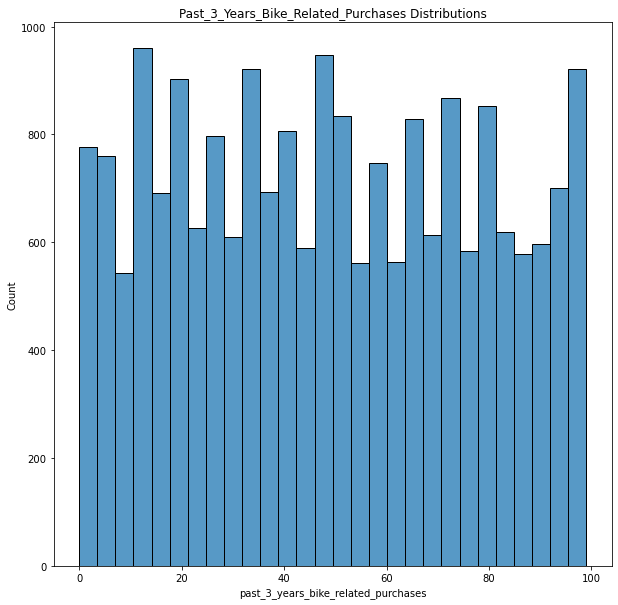

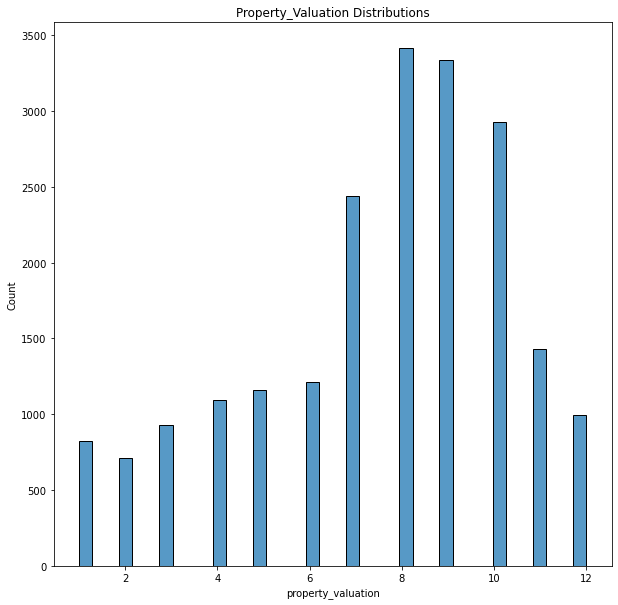

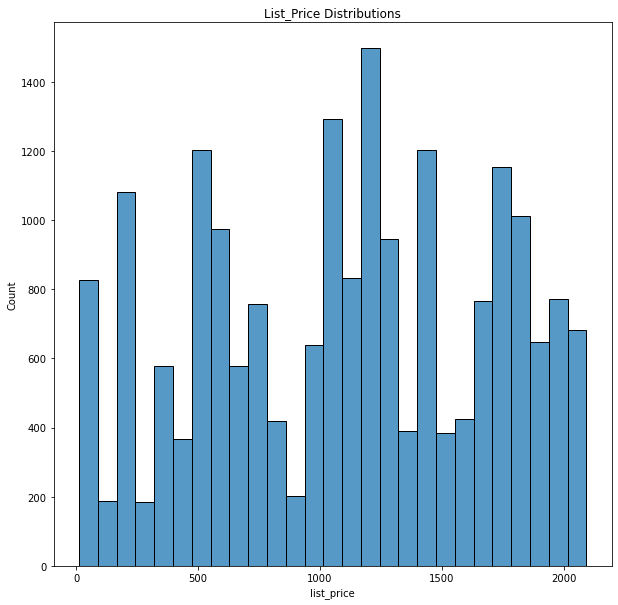

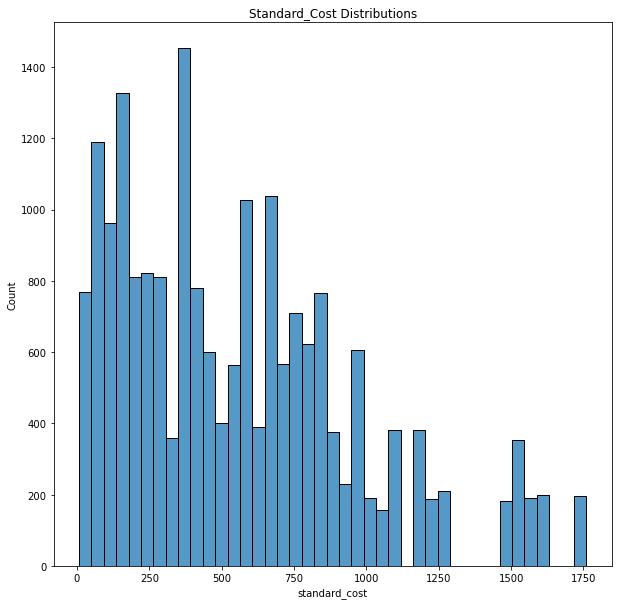

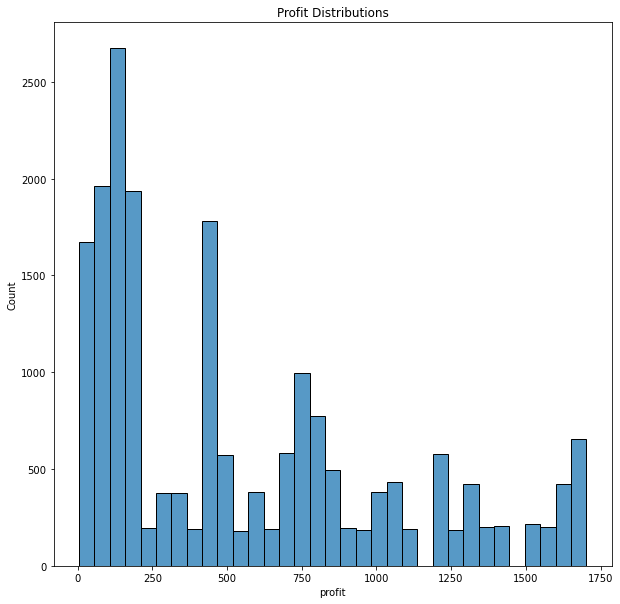

In [8]:
for i in num_features:
    fig, axes = plt.subplots(1, 1, figsize=(10,10))
    sns.histplot(data = df, x = df[i])
    plt.title(f'{i.title()} Distributions')
    #plt.savefig(f'Module 2/eda_graphs/{i}_distributions.png', dpi=600)
    plt.show()

Based on the graphs above, it's difficult to tell what demographic has made the most bike related purchases in the last 3 years or has a particular property valuation ranking.

We will learn more about total profits once we break these down and compare it to the other customer demographics.

Let's look at the distribution of the categorical values. For this we will exclude addresses, postcodes, and job titles as this is too granular. We will get a general idea with region and job industry.

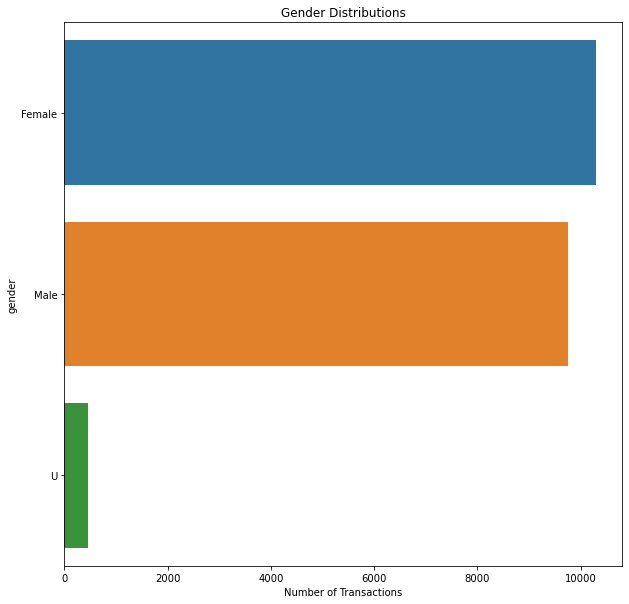

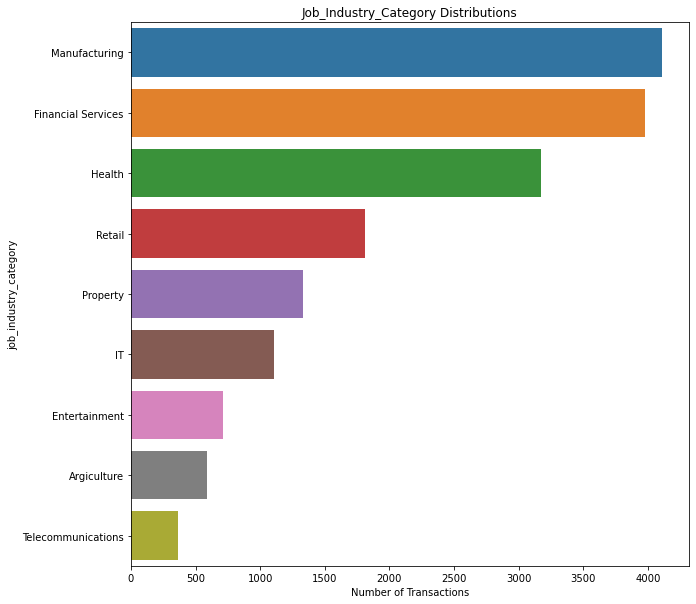

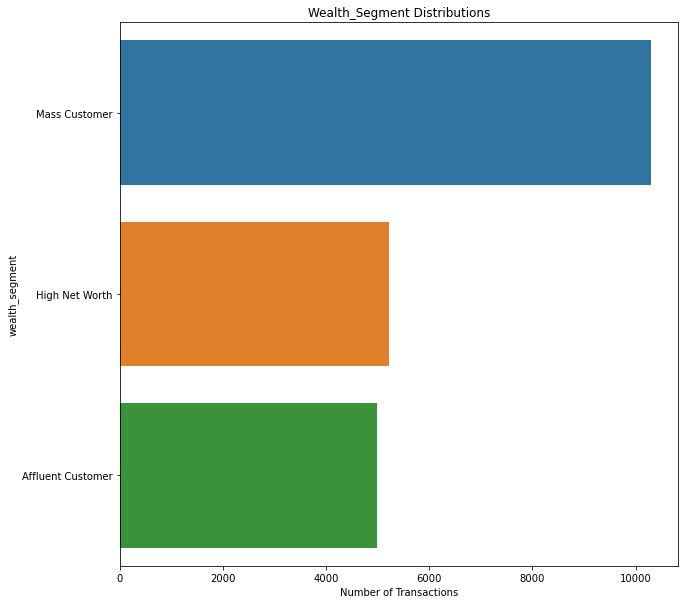

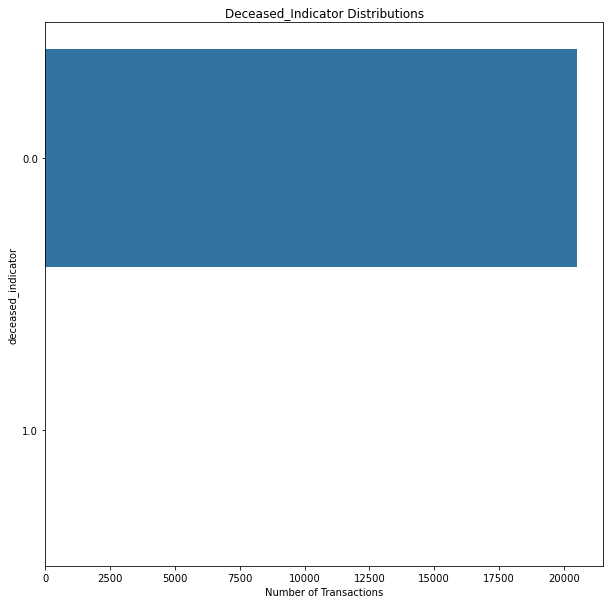

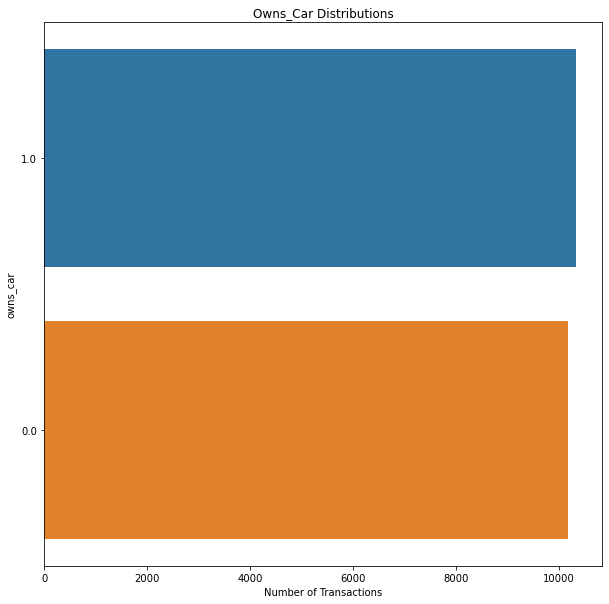

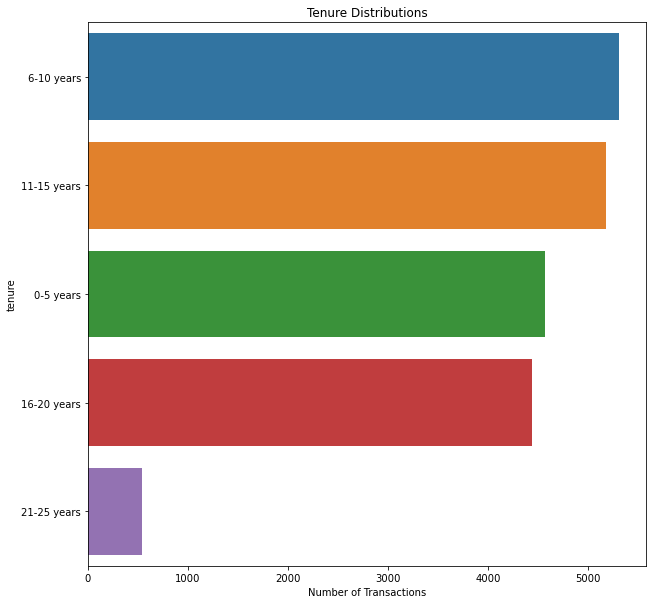

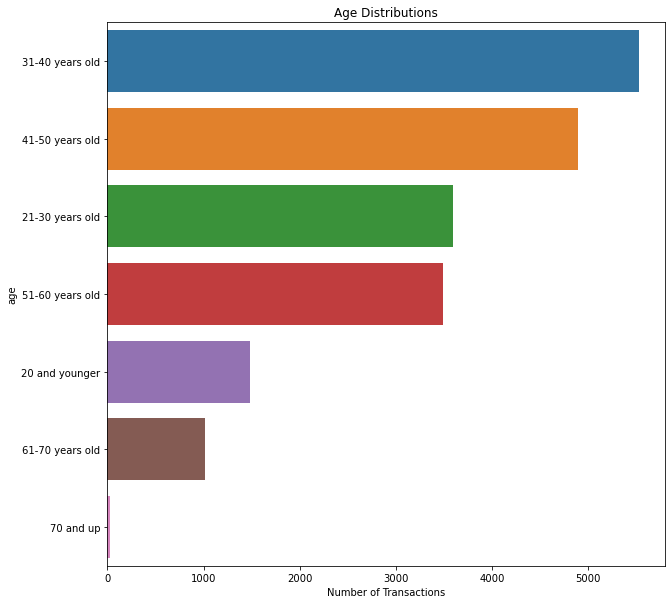

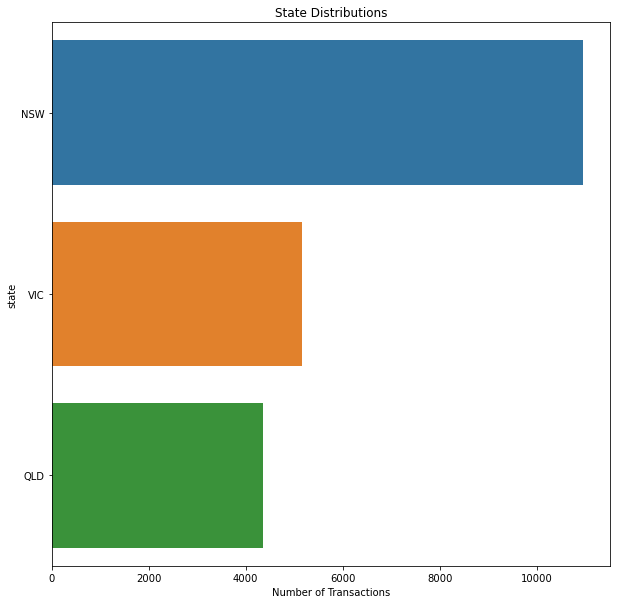

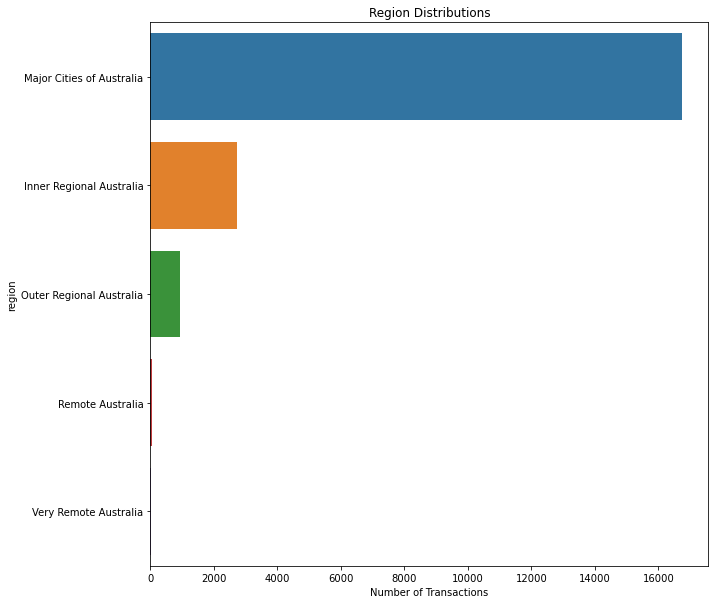

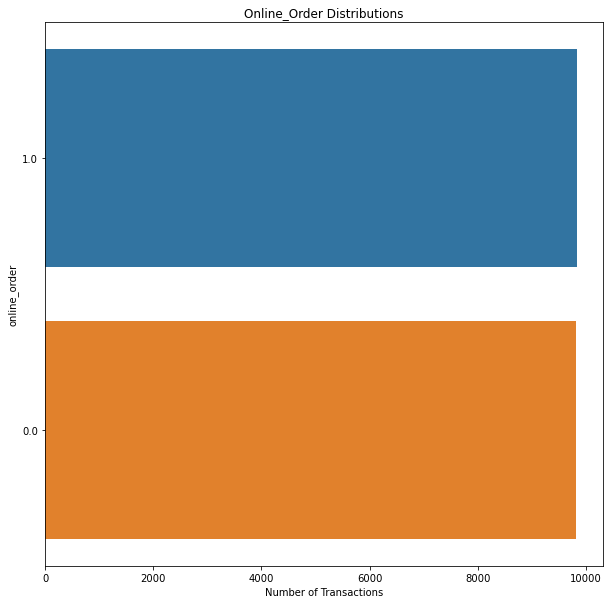

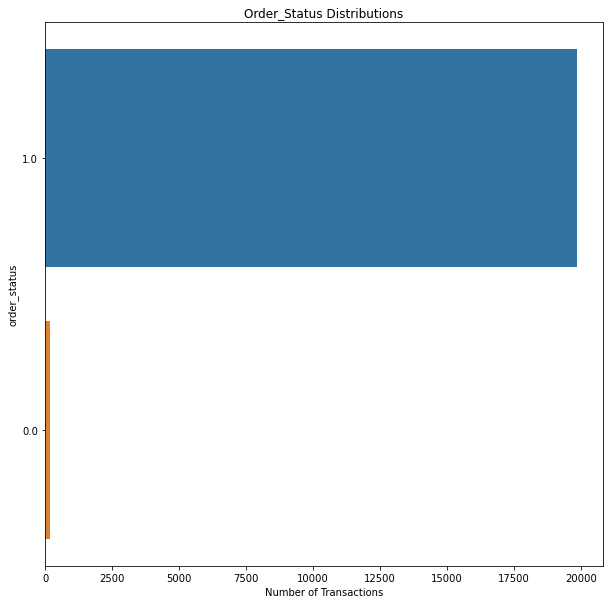

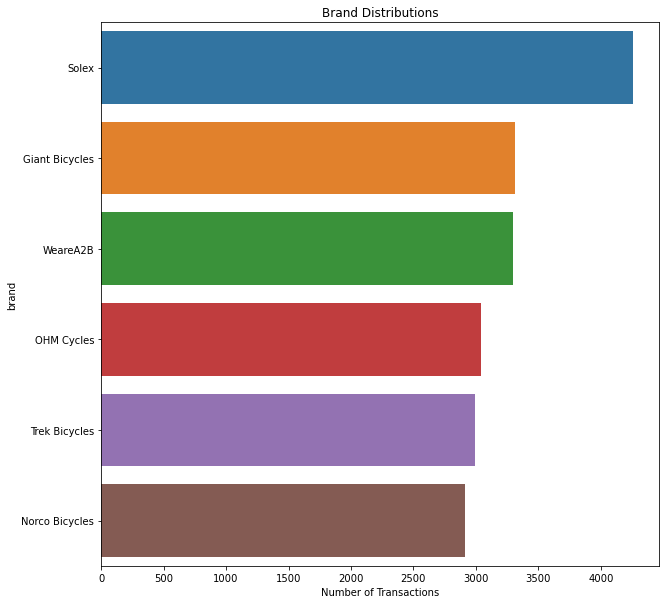

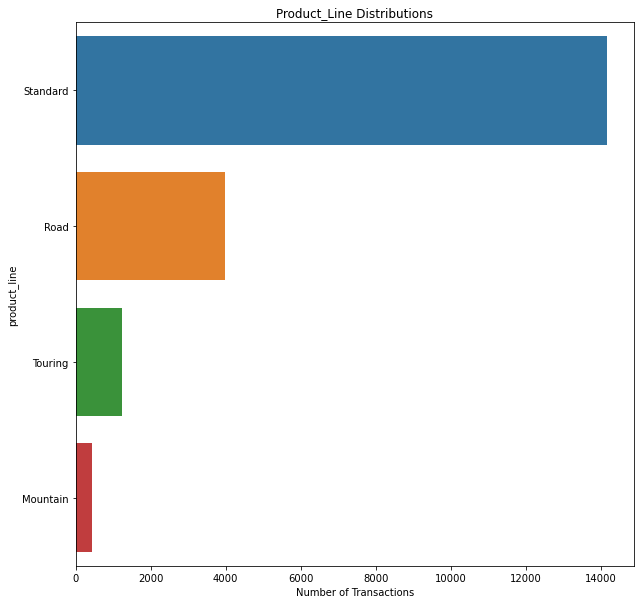

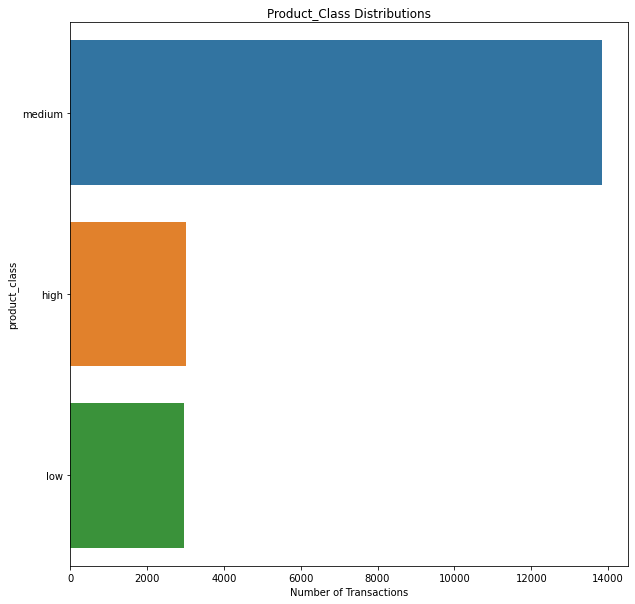

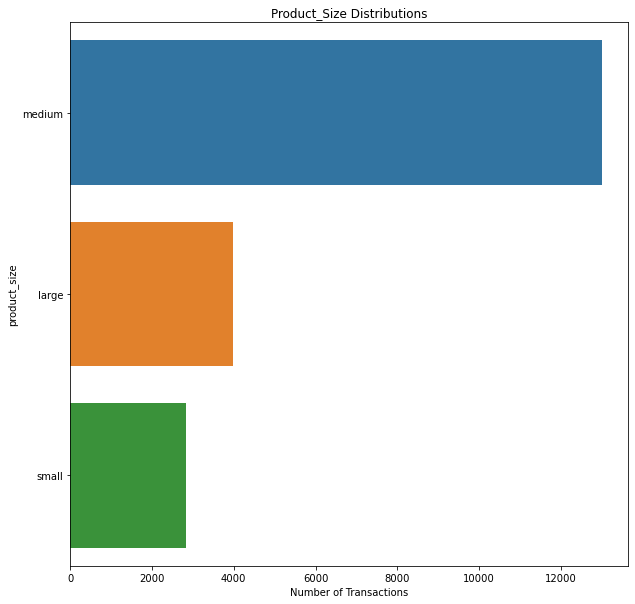

In [9]:
for i in cat_features:
    fig, axes = plt.subplots(1, 1, figsize=(10,10))
    counts_index = df[i].value_counts().index
    if len(counts_index) > 10:
        top10 = df[i].value_counts().head(10)
        sns.barplot(y=top10.index, x=top10.values)
        plt.title(f'Top 10 {i} Distributions')
    else:
        sns.countplot(data = df, y = df[i], order=df[i].value_counts().index)
        plt.title(f'{i.title()} Distributions')
    plt.xlabel('Number of Transactions')
    #plt.savefig(f'Module 2/eda_graphs/{i}_distributions.png', dpi=600)
    plt.show()

Based on the distributions we can already see who majority of our buyers tend to be:

- purchases are almost equally made by men and women, with women purchasing slightly more bikes in 2017
- mass marketers are the largest market segment
- the top industries purchasing bikes are manufacturing followed by the financial services industry and the health industry
- on average customers between the ages of 30-50 tend to purchase bikes; similarly, those with a tenure of 6-15 years are also the largest customer base. __NOTE:__ We need to be careful with tenure and age since we can already see a correlation between the two (ie. as we get older, we are in the workforce longer).
- Customers from New South Wales are more likely to make bike purchases
- Similarly, living in a major city in Australia means that they're more like to purchase a bike than if you were to live in a remote area. It would be interesting to see how many people own cars have bought bikes and live farther away from a major city.
- There don't seem to be any differences between online and in-person purchases, so this may not be an important factor to consider in targeting types of customers

Let's take a look at the products:

- The most popular brand is Solex followed by Giant Bicycles and WeareA2B
- The most popular type of bike by far is a standard bike; this possibly related to the fact that most purchases are made in major cities and thus distance and terrain are not too strenuous
- Customers tend to purchase bikes that are average or medium in class as well as size more than any other type of bike

    

# TRANSACTION DATES BY FEATURES

Let's take a look at how total profits vary by month for each feature.

In [10]:
import matplotlib.ticker as mtick

In [11]:
month_index = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July','August', 'September', 'October', 'November', 'December']

In [12]:
df['Month'] = pd.DatetimeIndex(df.transaction_date).month

In [13]:
def price_lineplot(dt_feat, feat, price, func, title_of_function):
    
    plt_df = df.loc[:, [dt_feat, feat, price]]
    plt_df[dt_feat] = pd.DatetimeIndex(plt_df[dt_feat]).month
    plt_grouped = plt_df.groupby([dt_feat, feat]).agg(func).reset_index()
    
    fig, axes = plt.subplots(1, 1, figsize=(15,10))
    sns.lineplot(data=plt_grouped, x=dt_feat, y=price, hue=feat)
    plt.title(f'{title_of_function.title()} {price.title()} by {feat.title()}')
    
    # set month labels
    axes.set_xticks(plt_df[dt_feat].value_counts().index.sort_values())
    axes.set_xticklabels(month_index)

    # format profits
    axes.yaxis.set_major_formatter('${x:,.0f}')

    plt.ylabel(f'{title_of_function.title()} Profits')
    #plt.savefig(f'Module 2/eda_graphs/profit_by_{feat}.png', dpi=600)
    plt.show()

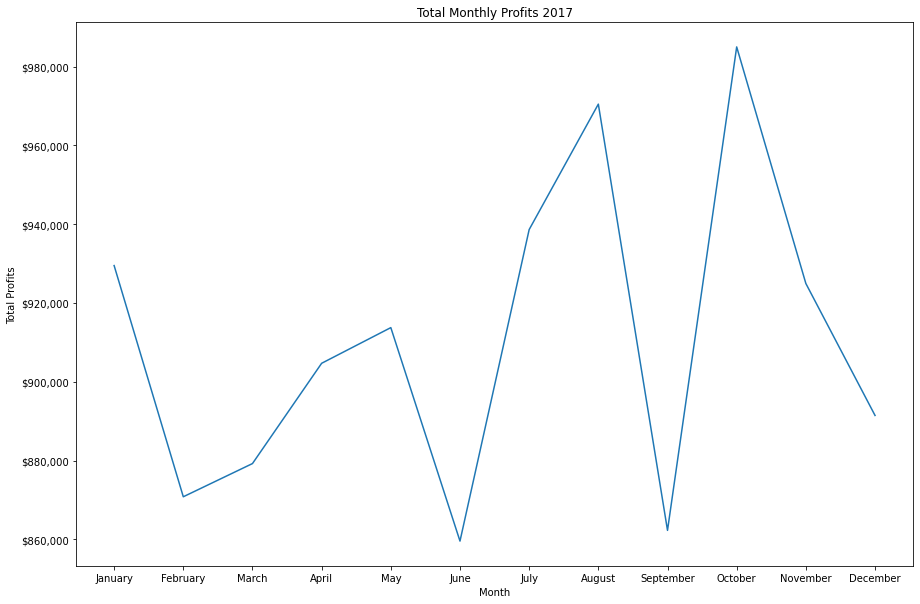

In [14]:
transactions = df.loc[:, ['Month', 'profit']].groupby('Month').sum().reset_index()

fig, ax = plt.subplots(1, 1, figsize=(15,10))
sns.lineplot(data=transactions, x='Month', y='profit')
plt.title('Total Monthly Profits 2017')

# set month labels
ax.set_xticks(range(1,13))
ax.set_xticklabels(month_index)

# format profits
fmt = '${x:,.0f}'
ax.yaxis.set_major_formatter(fmt)
    
plt.ylabel('Total Profits')
#plt.savefig(f'Module 2/eda_graphs/total_profit_by_monthly_transactions_2017.png', dpi=600)
plt.show()

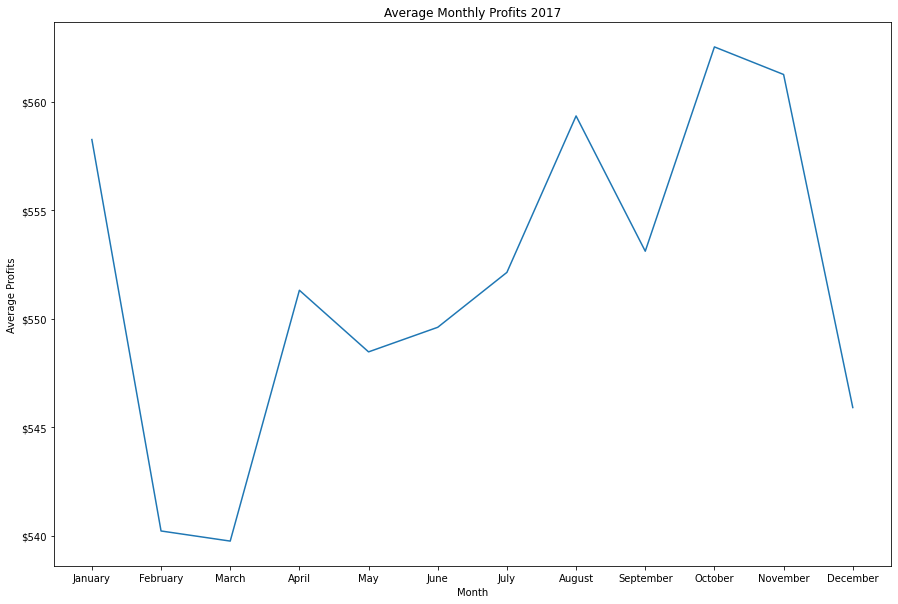

In [15]:
transactions = df.loc[:, ['Month', 'profit']].groupby('Month').mean().reset_index()

fig, ax = plt.subplots(1, 1, figsize=(15,10))
sns.lineplot(data=transactions, x='Month', y='profit')
plt.title('Average Monthly Profits 2017')

# set month labels
ax.set_xticks(range(1,13))
ax.set_xticklabels(month_index)

# format profits
fmt = '${x:,.0f}'
ax.yaxis.set_major_formatter(fmt)
    
plt.ylabel('Average Profits')
#plt.savefig(f'Module 2/eda_graphs/total_profit_by_monthly_transactions_2017.png', dpi=600)
plt.show()

There is a peak in bike profit during the months of August near the end of the winter and October during the spring when it is warm enough to bike, but is not excessively hot like it is in the summer months from December through February. Let's break this down further by feature.

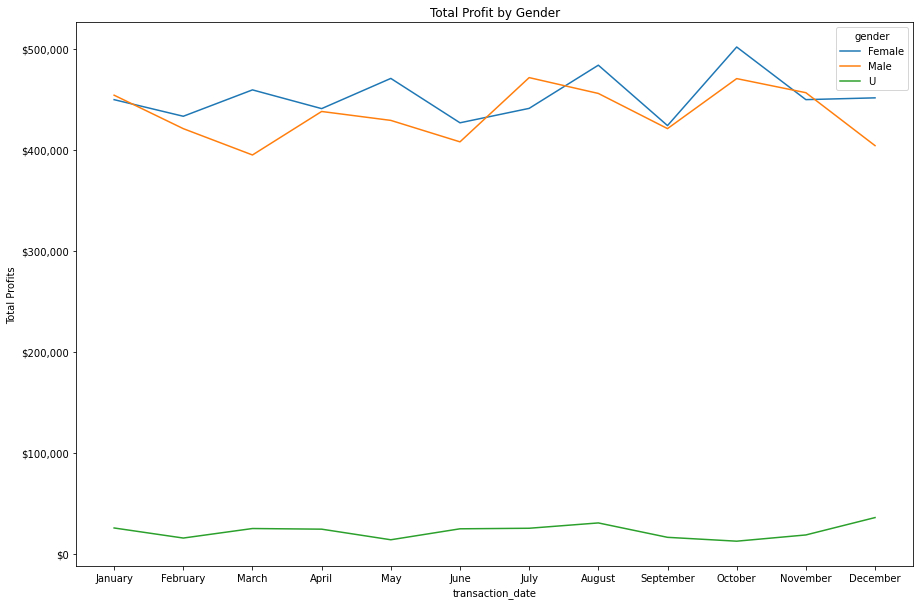

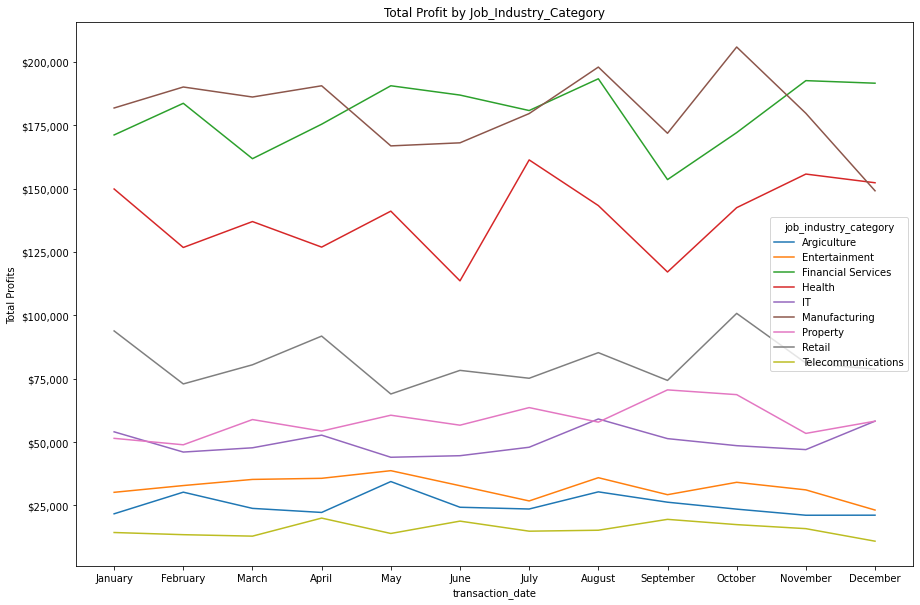

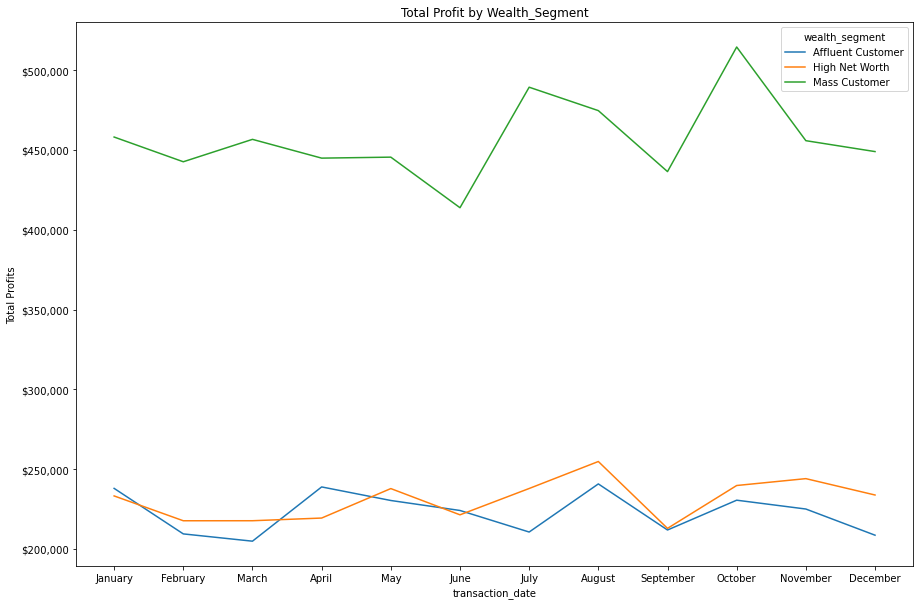

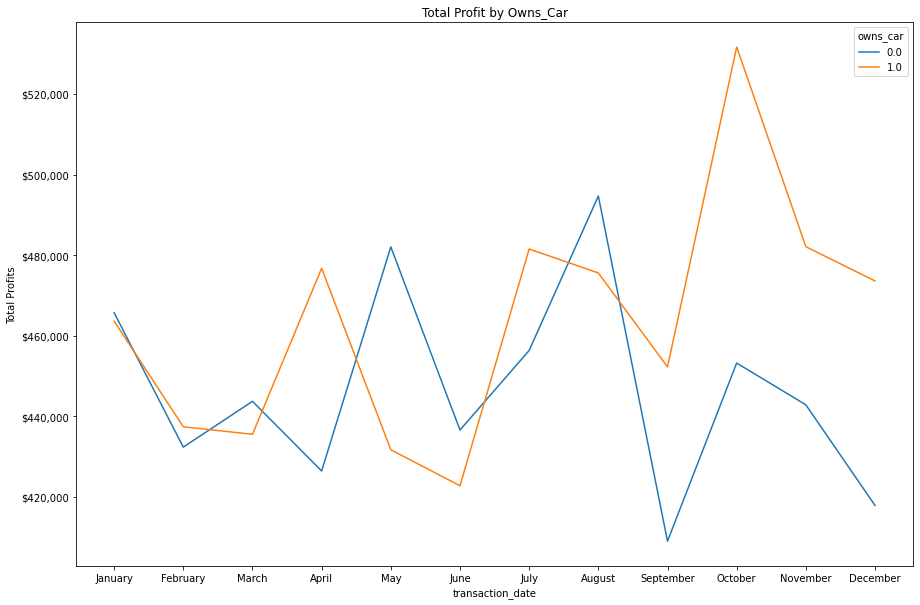

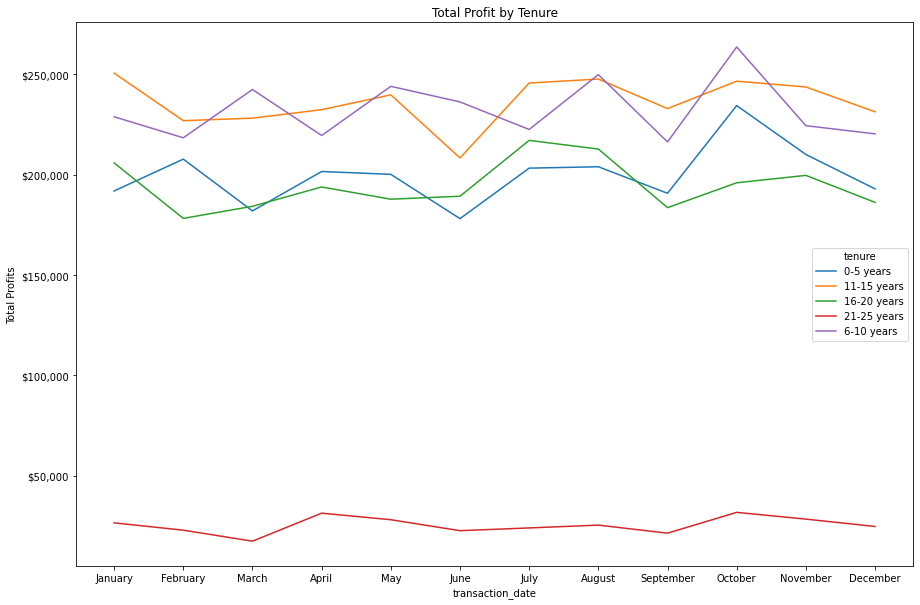

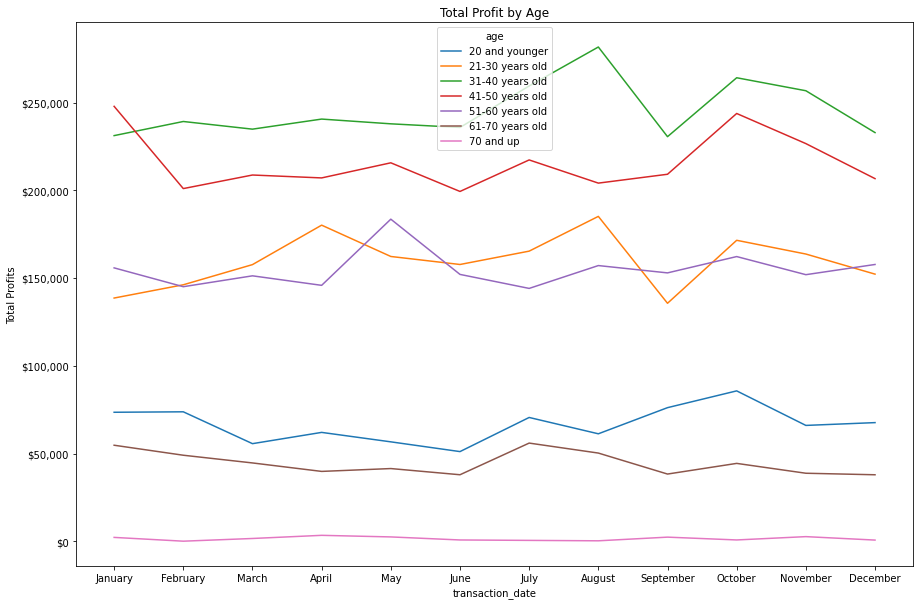

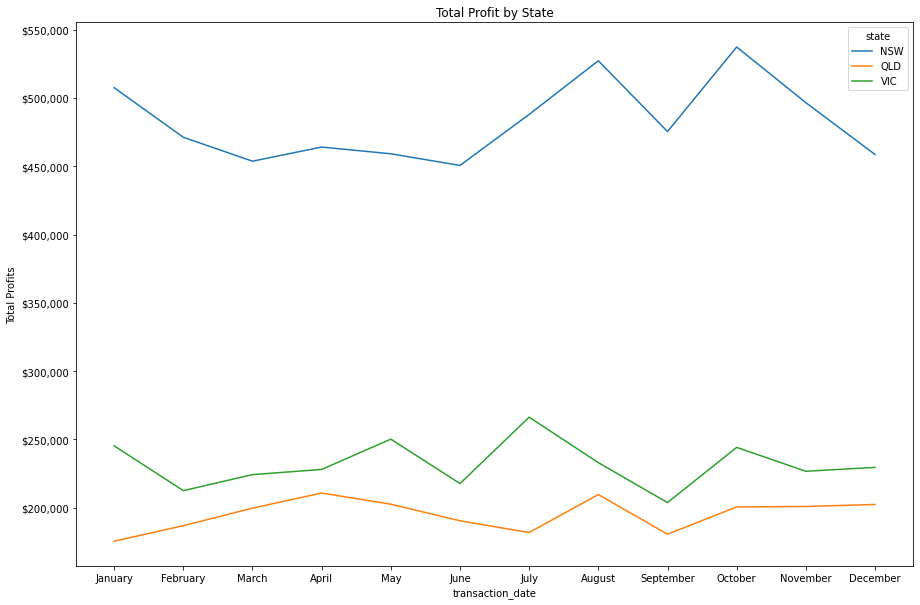

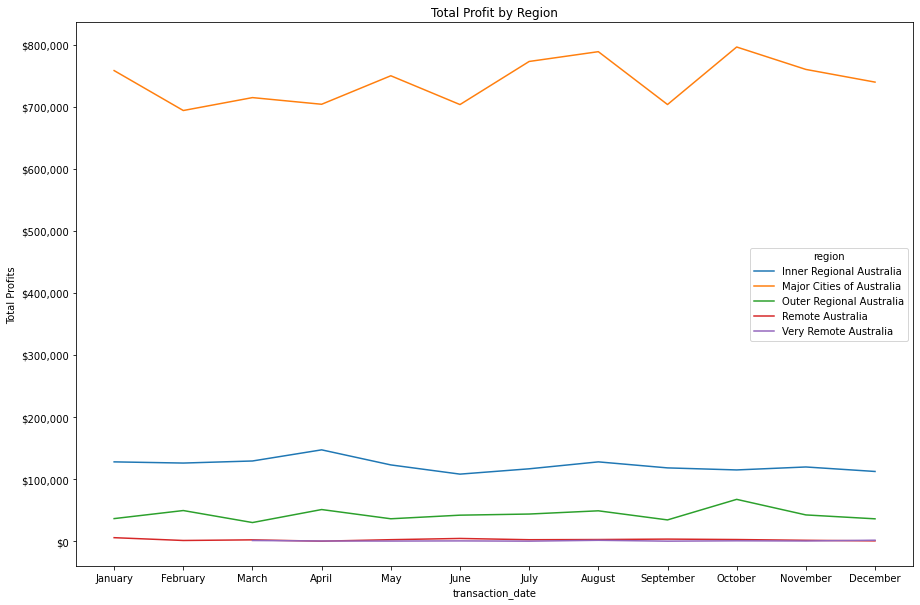

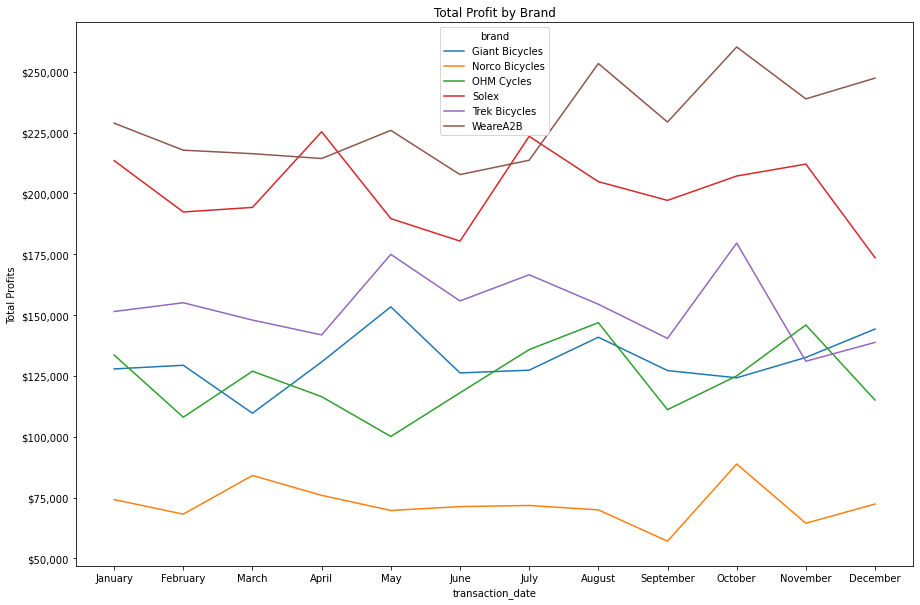

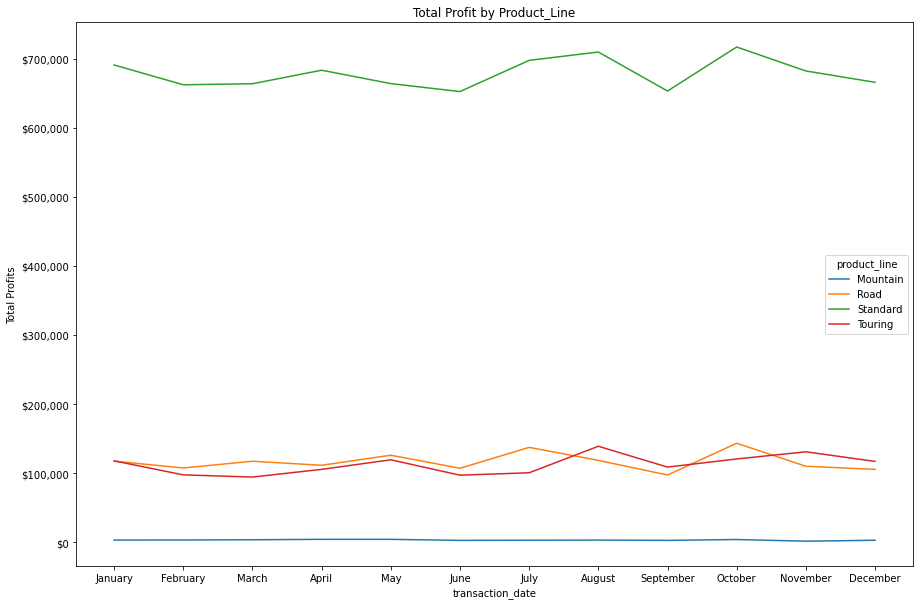

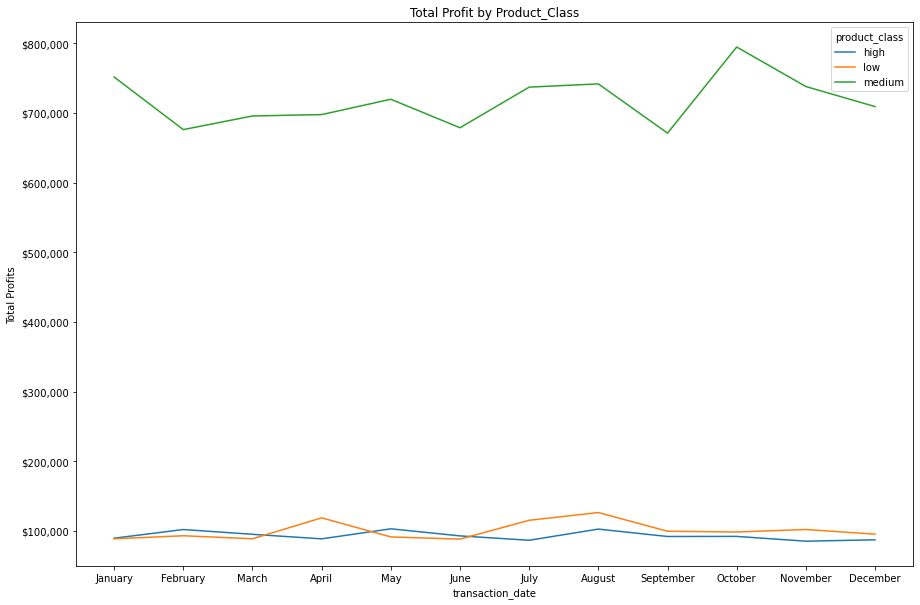

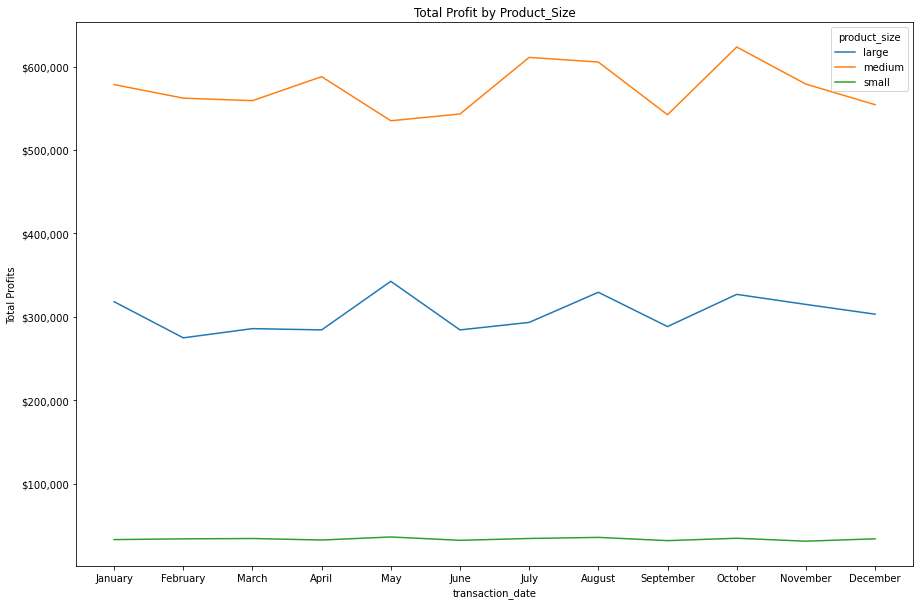

In [16]:
cat_features = [ 'gender', 'job_industry_category', 'wealth_segment','owns_car', 'tenure', 'age', 
                'state', 'region', 'brand', 'product_line', 'product_class', 'product_size']

for i in cat_features:
    price_lineplot('transaction_date', i, price = 'profit', func='sum', title_of_function='total')

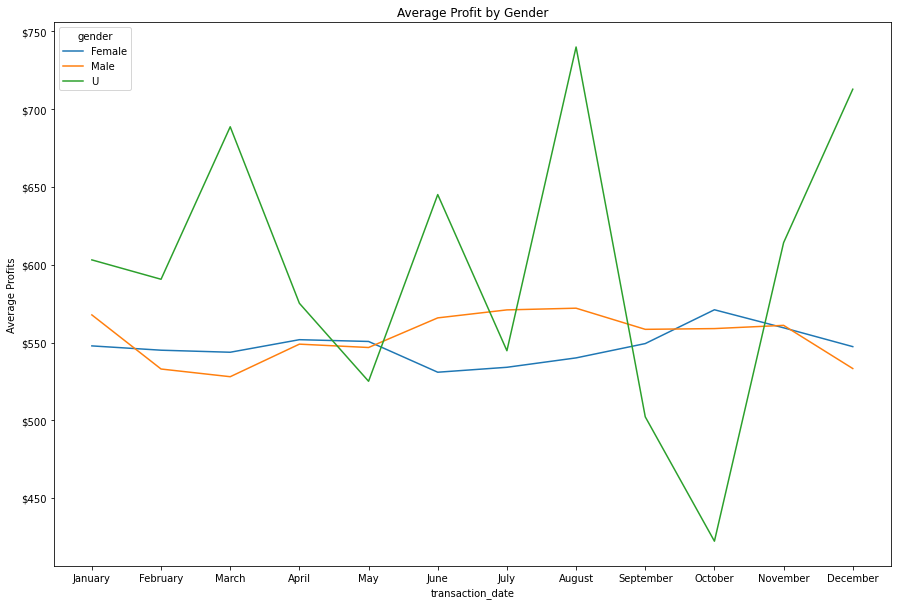

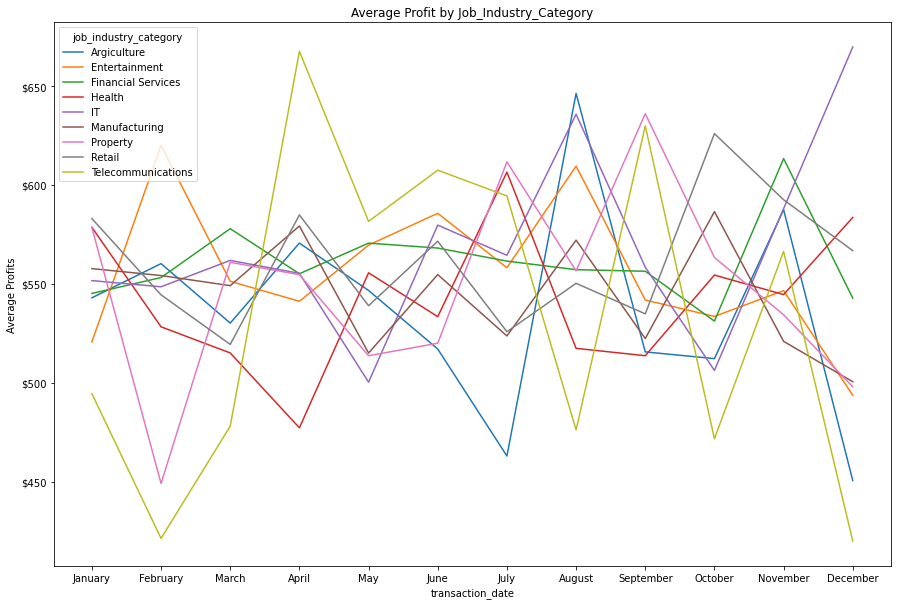

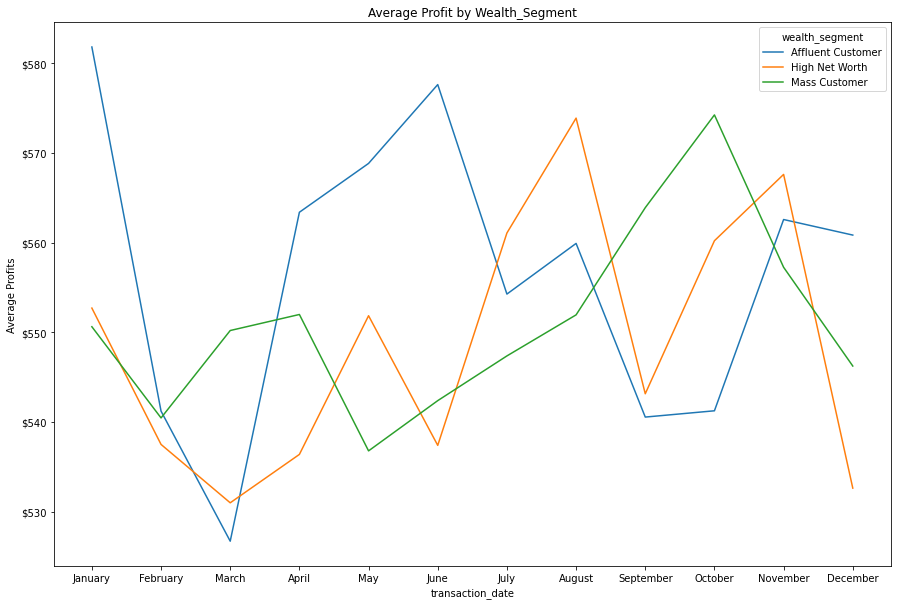

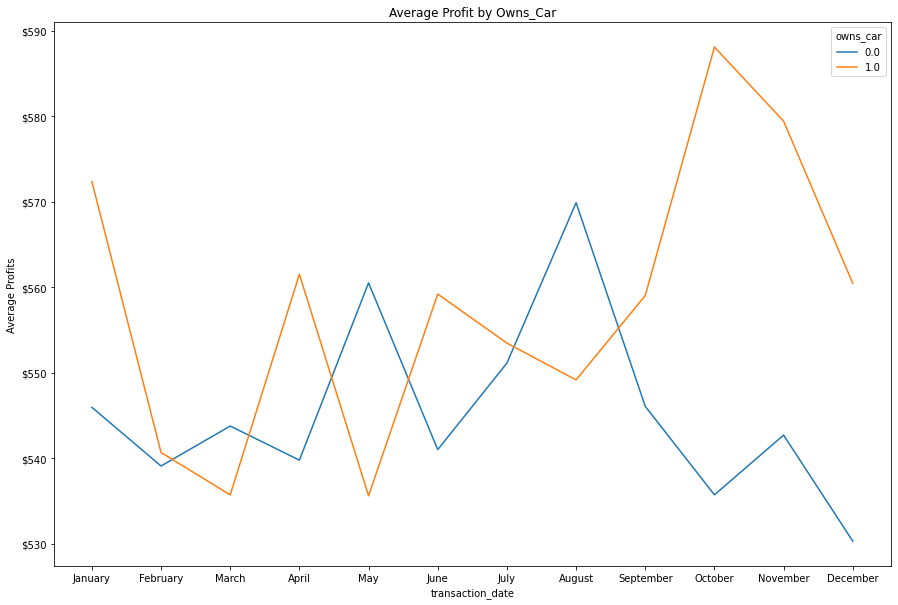

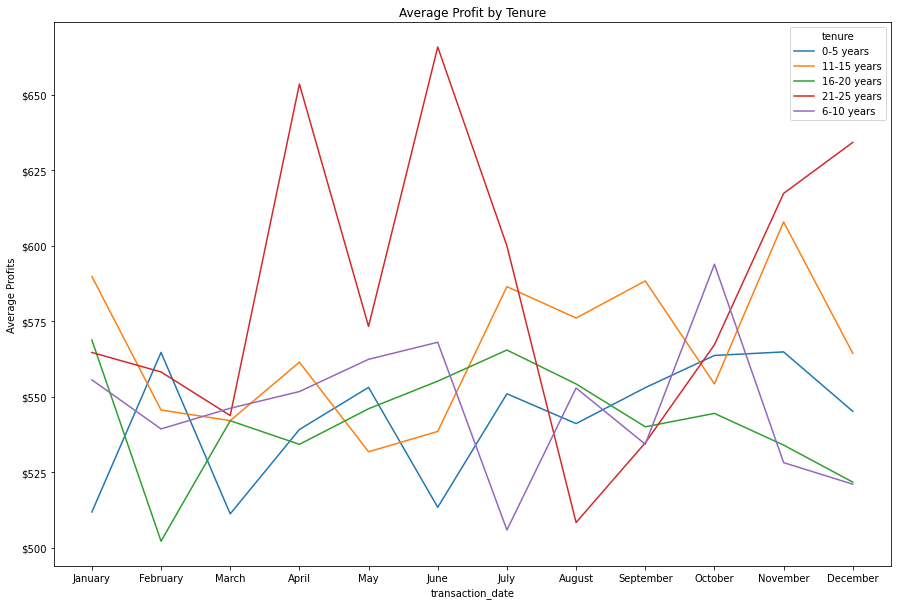

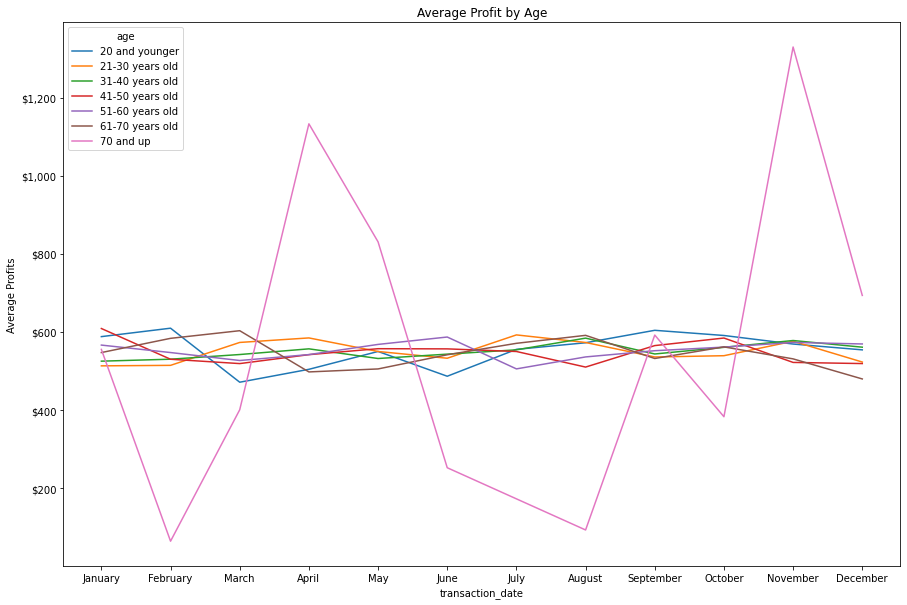

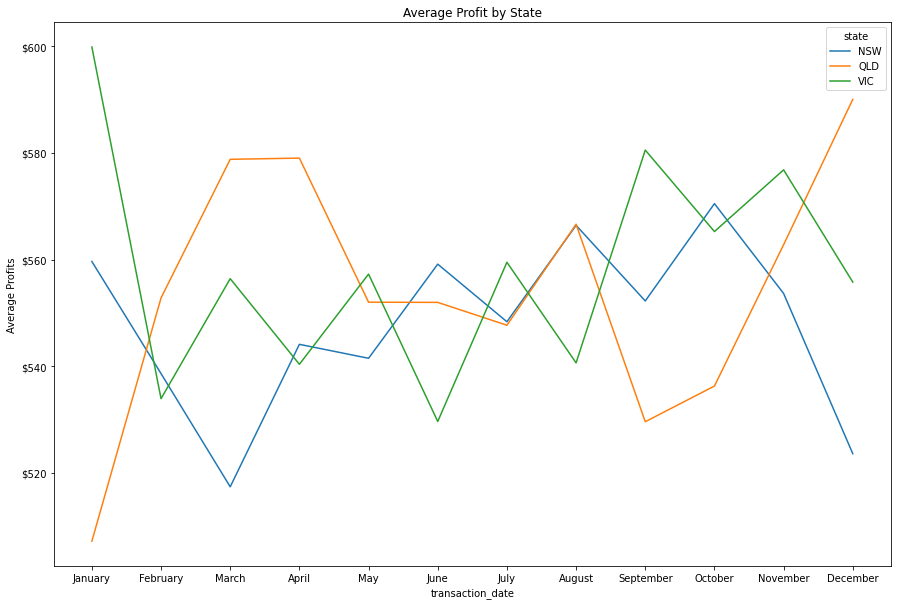

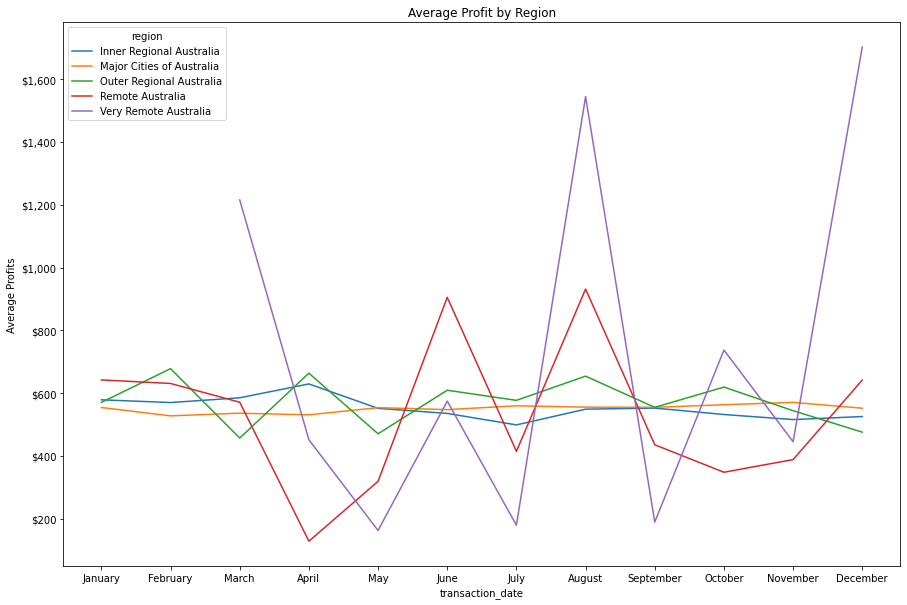

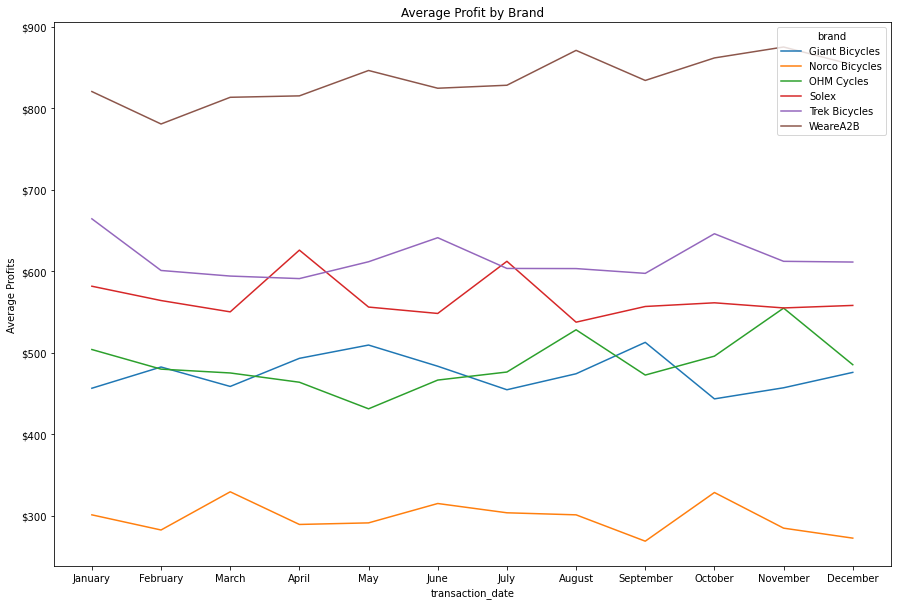

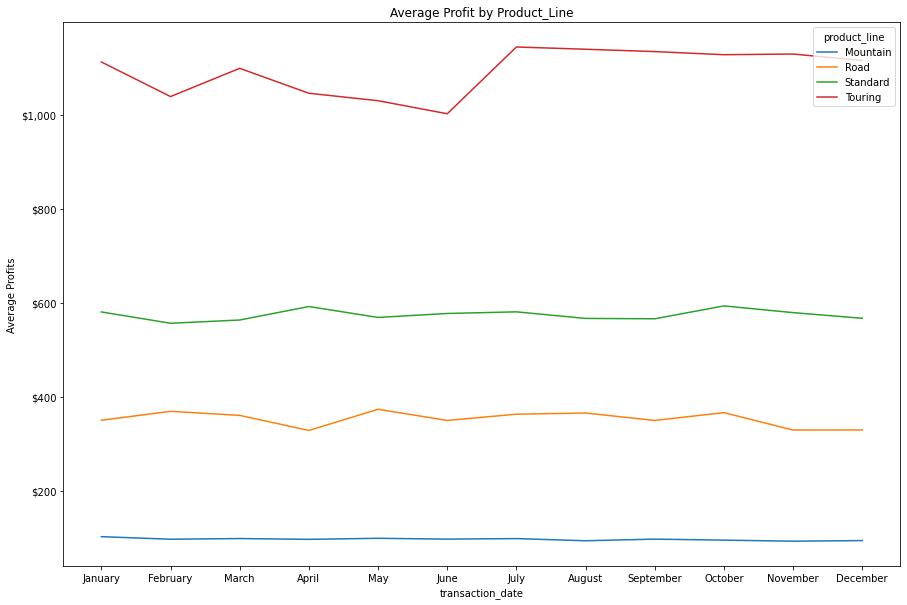

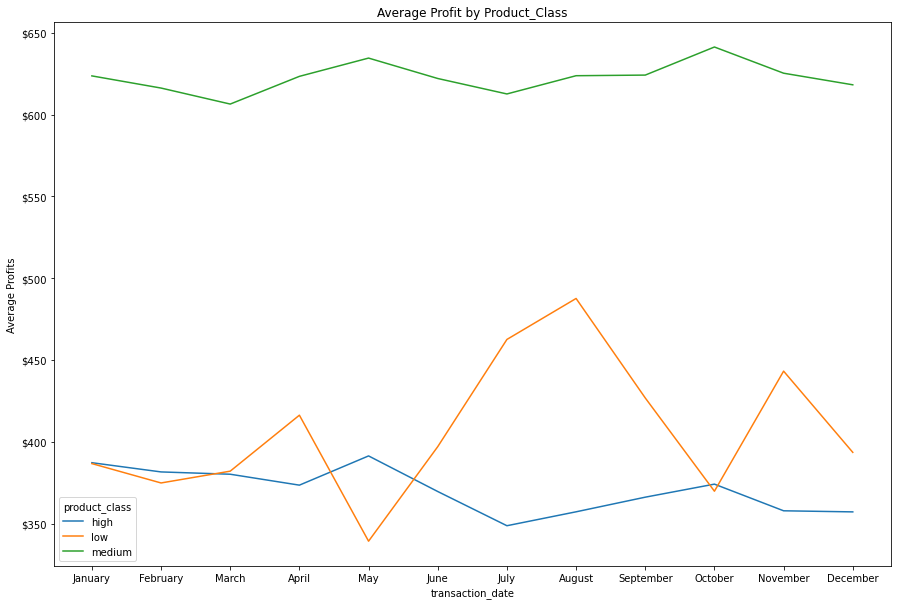

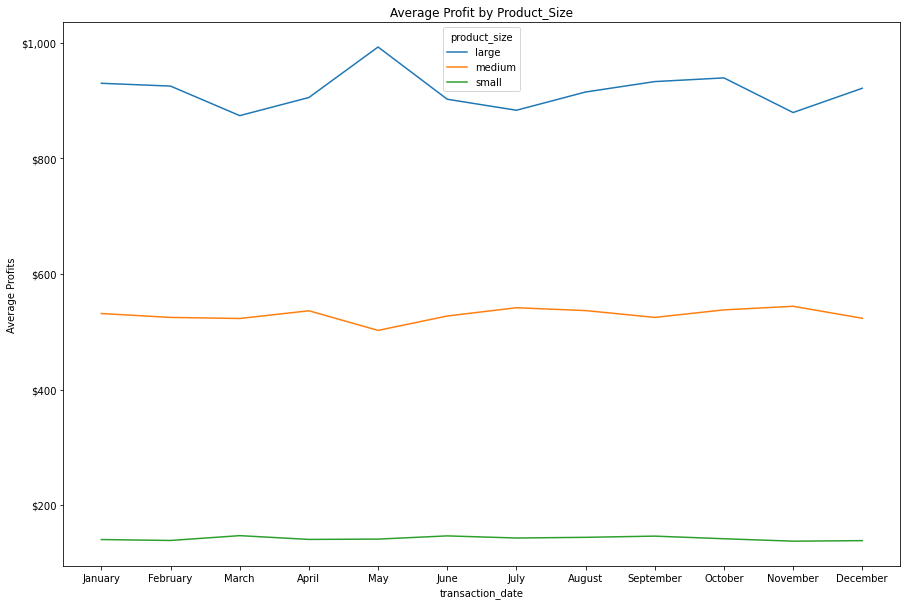

In [17]:
for i in cat_features:
    price_lineplot('transaction_date', i, price = 'profit', func='mean', title_of_function='average')

In [18]:
# # break down by list_price
# for i in cat_features:
#     price_lineplot('transaction_date', i, price = 'list_price')

In [19]:
def profit_pie_chart(feat, profit = 'profit'):
    
    plt.figure(figsize=(10,10))
    total = df.loc[:, [feat, profit]].groupby(feat).sum().reset_index()
    plt.pie(total[profit], labels=total[feat], autopct='%.0f%%')
    plt.title(f'Percentage of {feat.title()} by Profit')
    #plt.savefig(f'Module 2/eda_graphs/pct_of_profit_{feat}.png', dpi=600)
    plt.show()

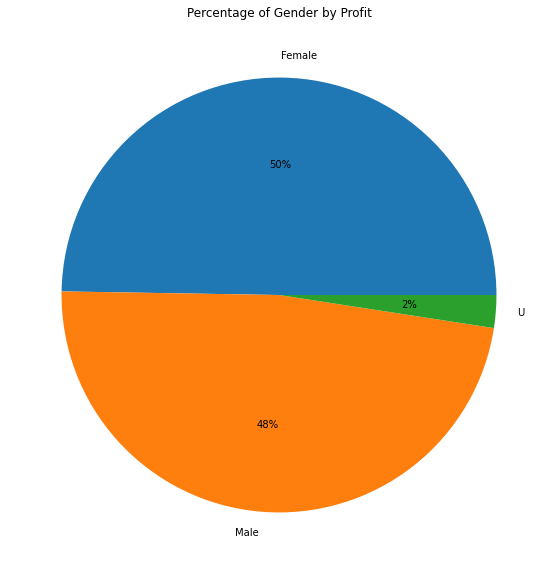

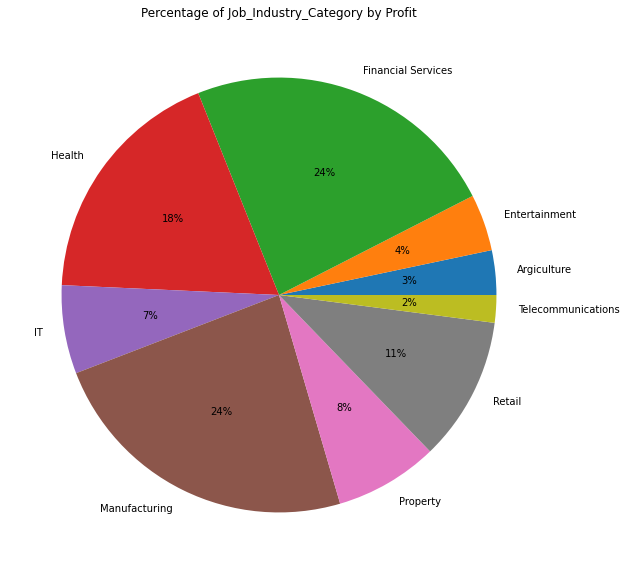

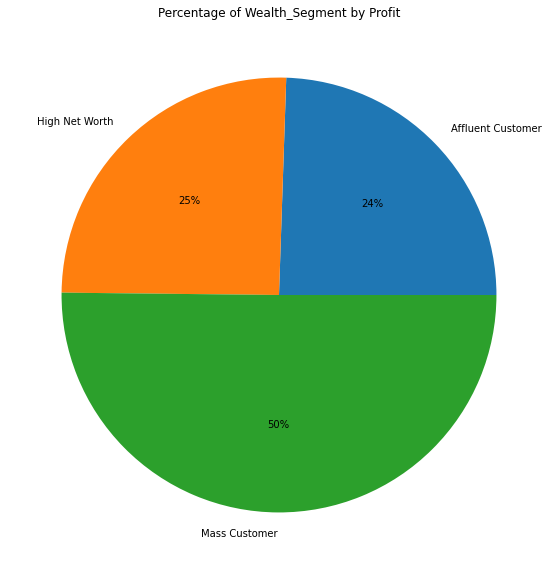

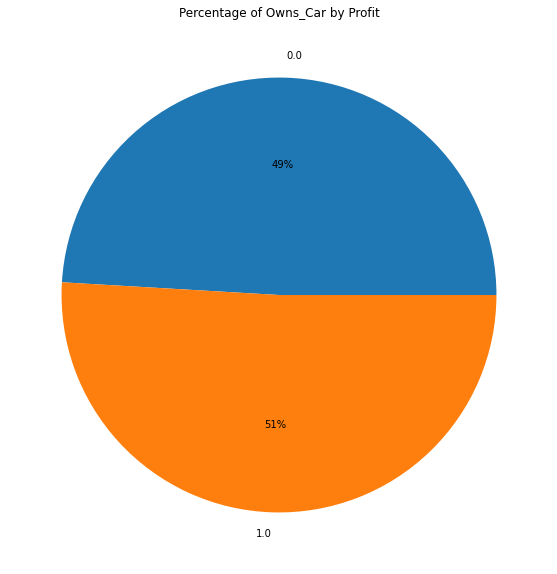

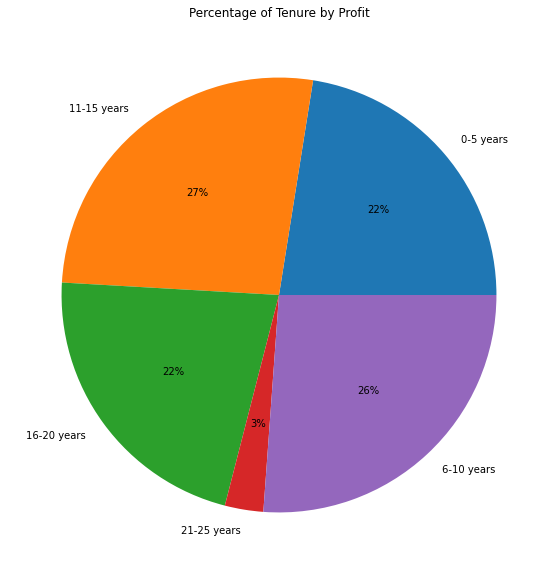

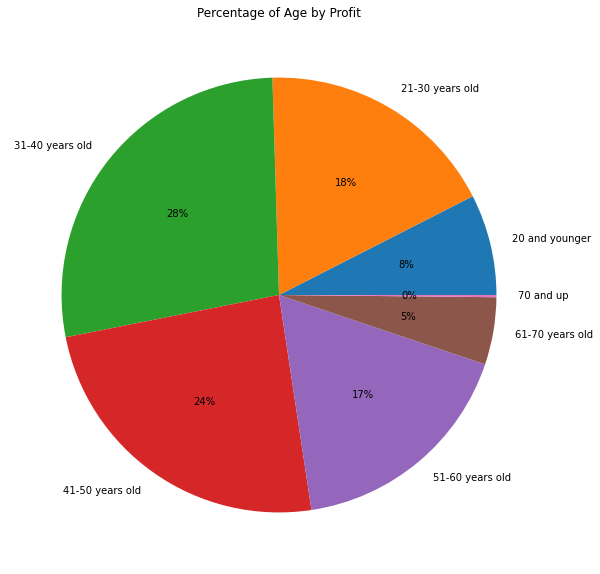

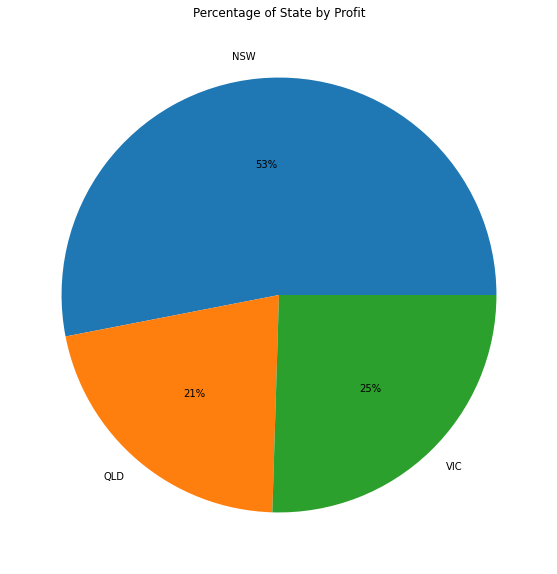

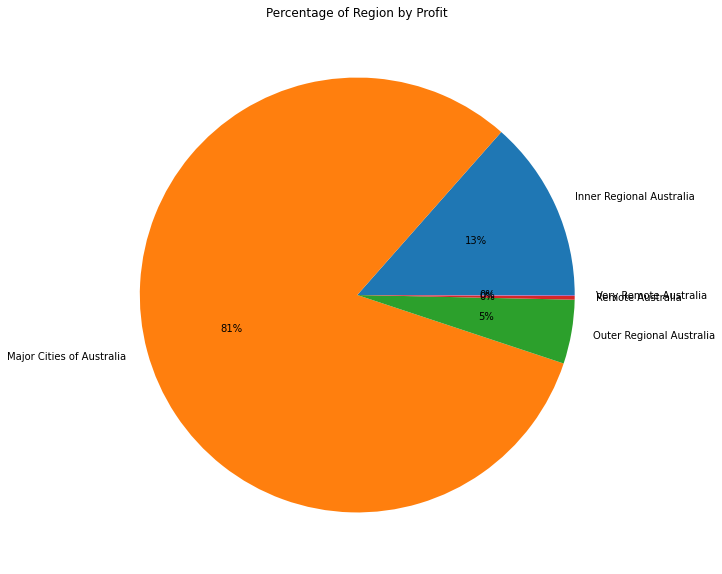

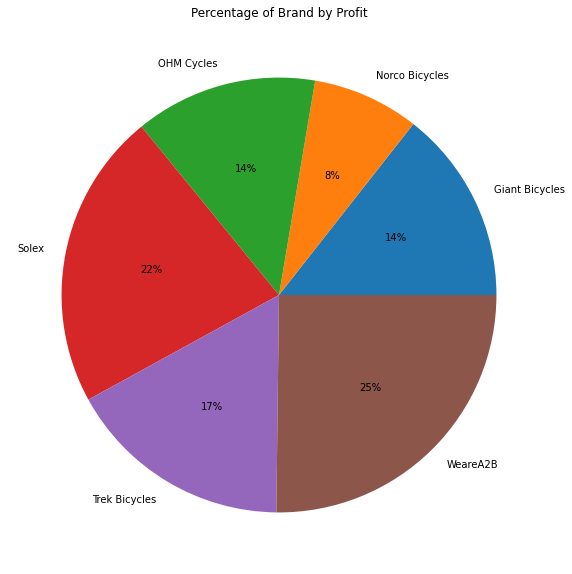

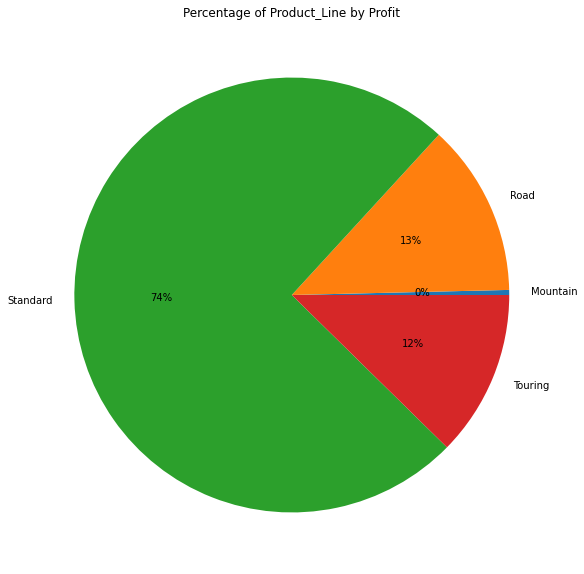

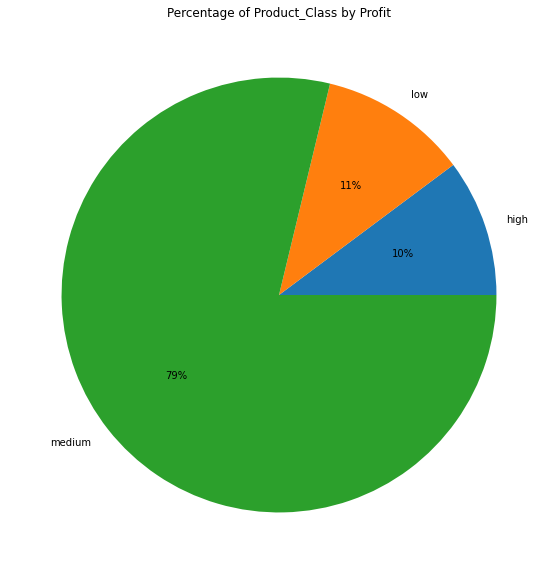

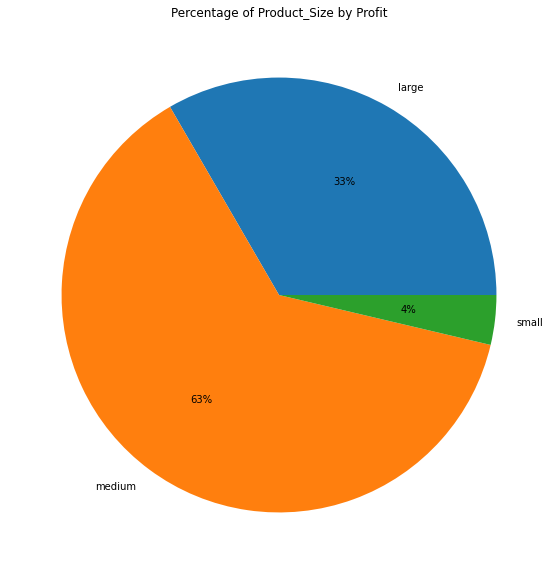

In [20]:
for i in cat_features:
    profit_pie_chart(i)

In [21]:
product = ['brand', 'product_line', 'product_class', 'product_size']

for i in cat_features:
    print(df[i].unique())

['Female' 'Male' 'U' nan]
['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
['Mass Customer' 'Affluent Customer' 'High Net Worth' nan]
[ 1.  0. nan]
['11-15 years' '16-20 years' '6-10 years' '0-5 years' '21-25 years' nan]
['61-70 years old' '31-40 years old' '51-60 years old' '41-50 years old'
 '21-30 years old' '20 and younger' nan '70 and up']
['NSW' nan 'QLD' 'VIC']
['Major Cities of Australia' nan 'Outer Regional Australia'
 'Inner Regional Australia' 'Very Remote Australia' 'Remote Australia']
['OHM Cycles' 'Solex' 'Trek Bicycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
['Standard' 'Road' 'Mountain' 'Touring' nan]
['medium' 'low' 'high' nan]
['medium' 'small' 'large' nan]


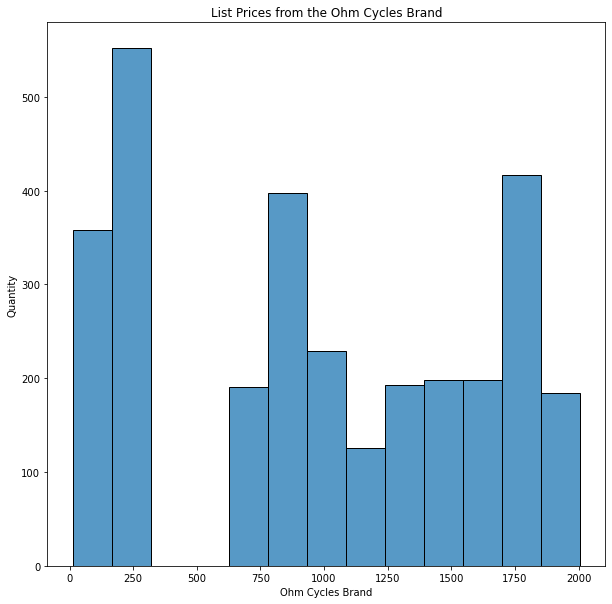

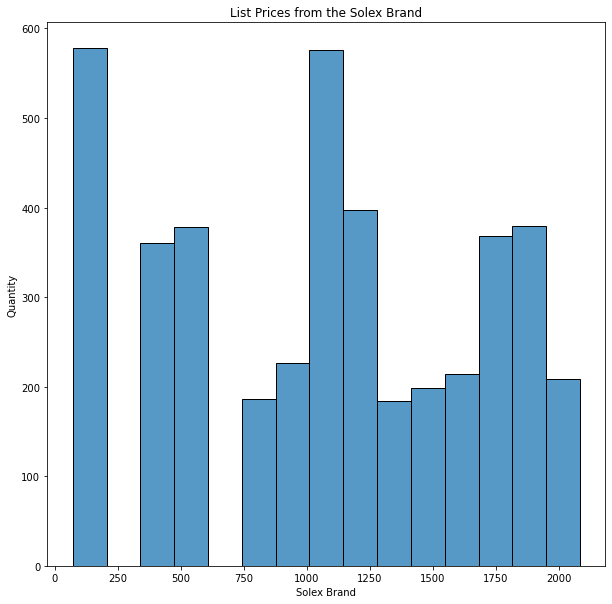

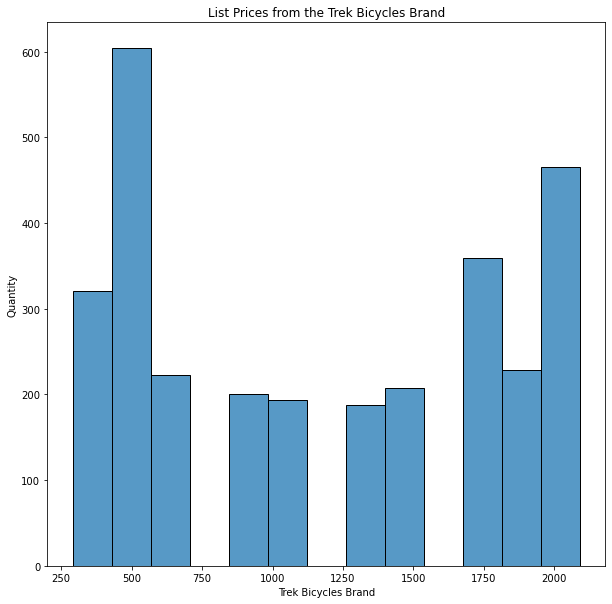

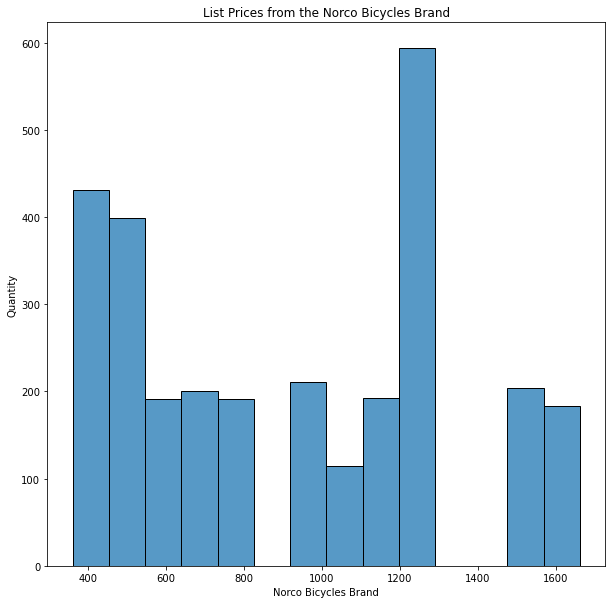

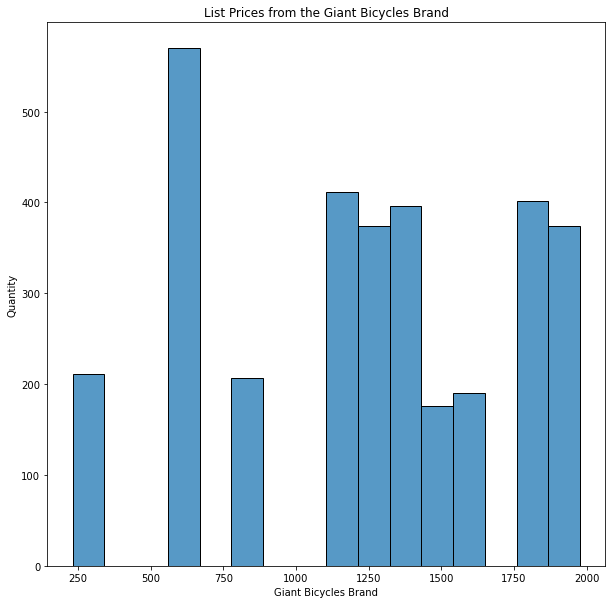

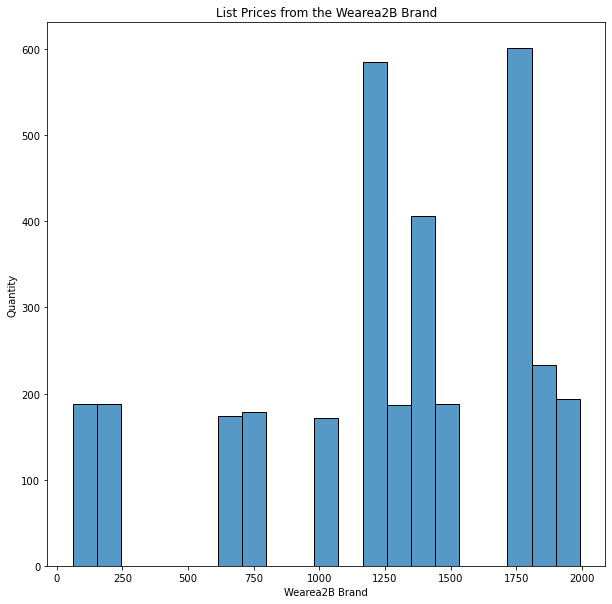

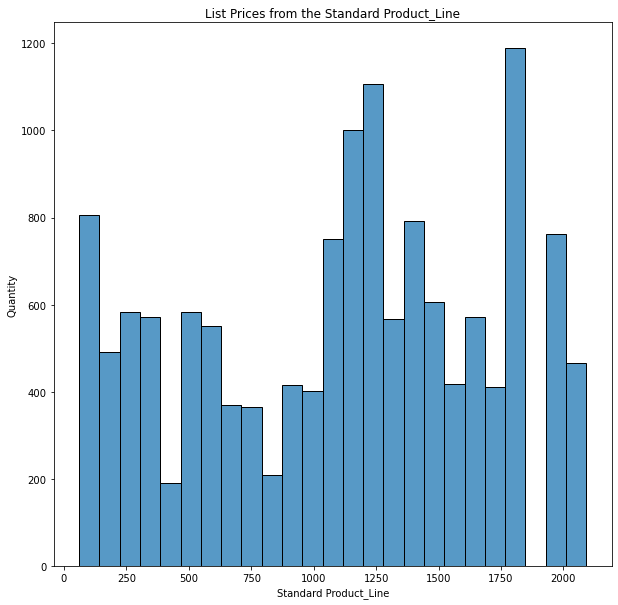

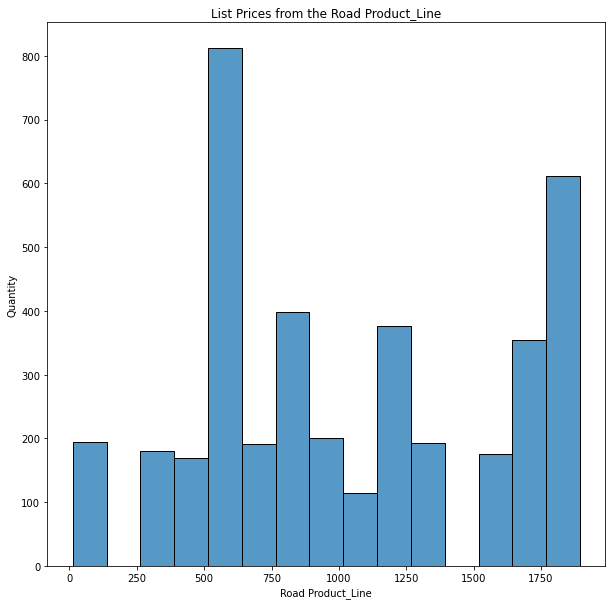

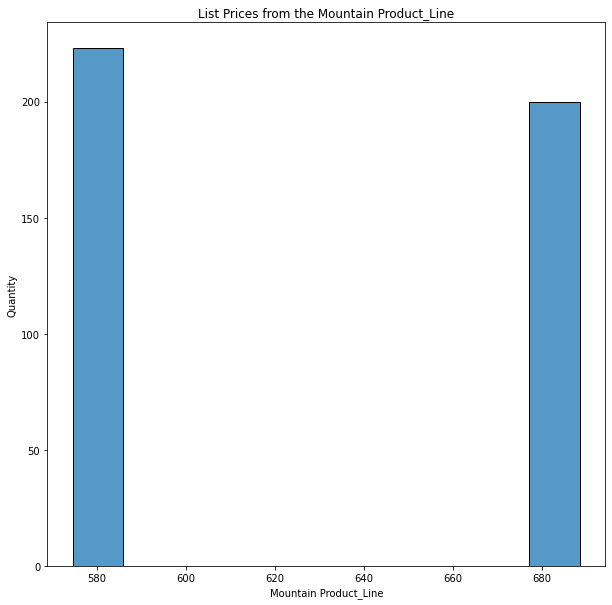

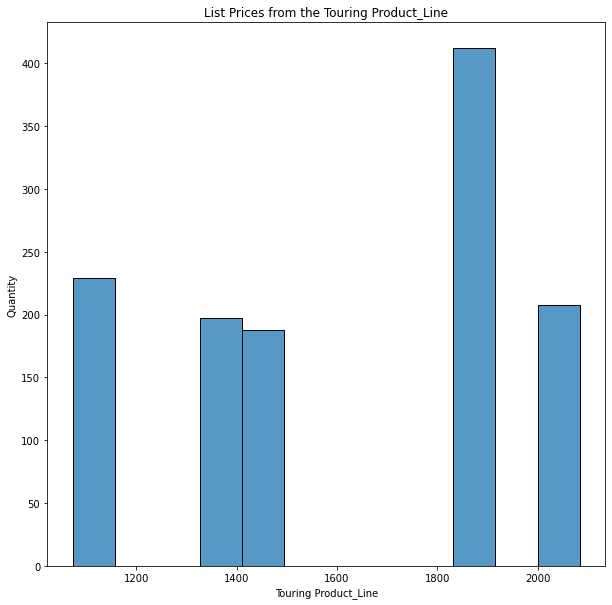

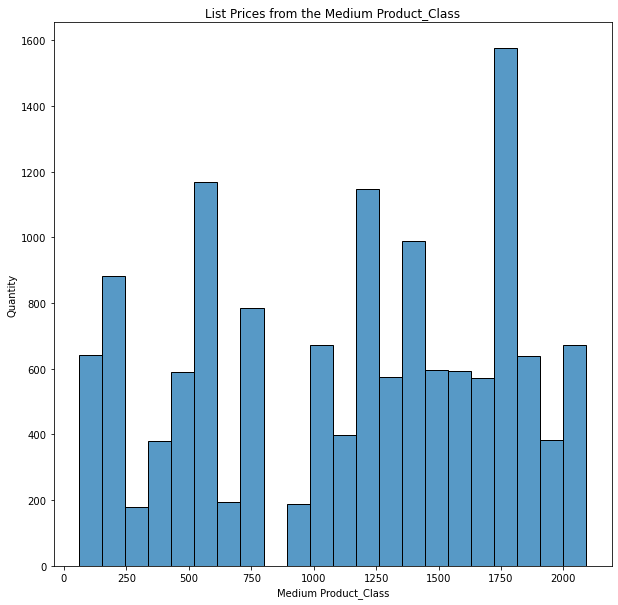

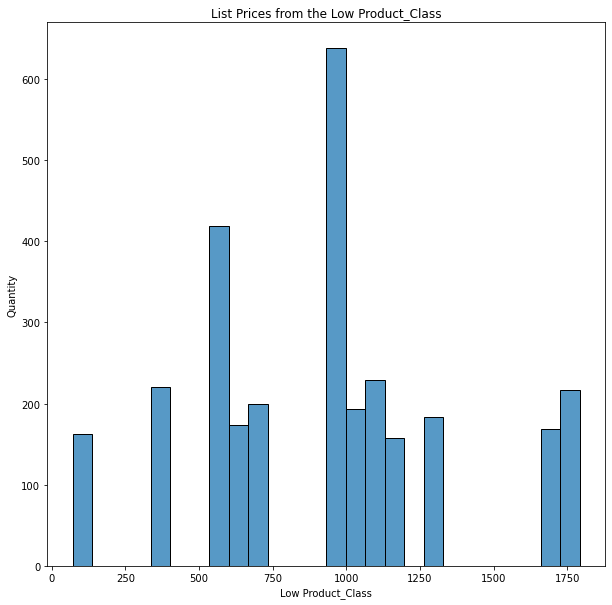

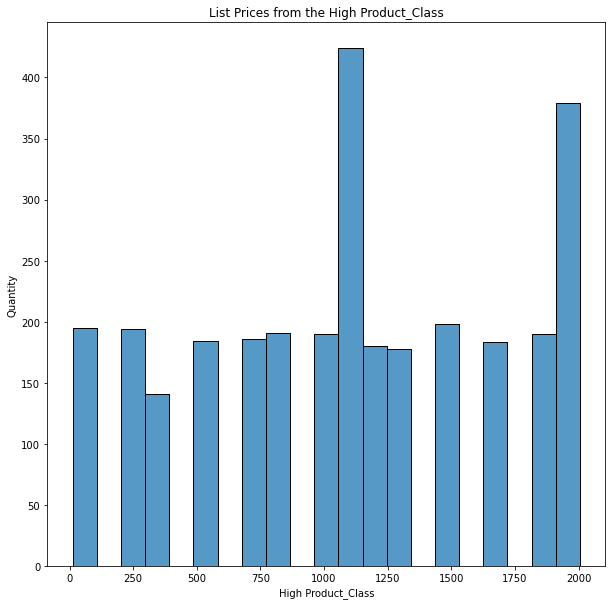

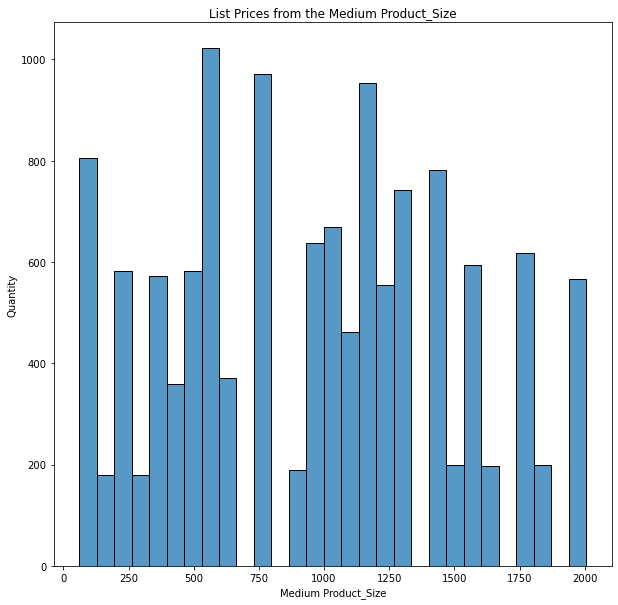

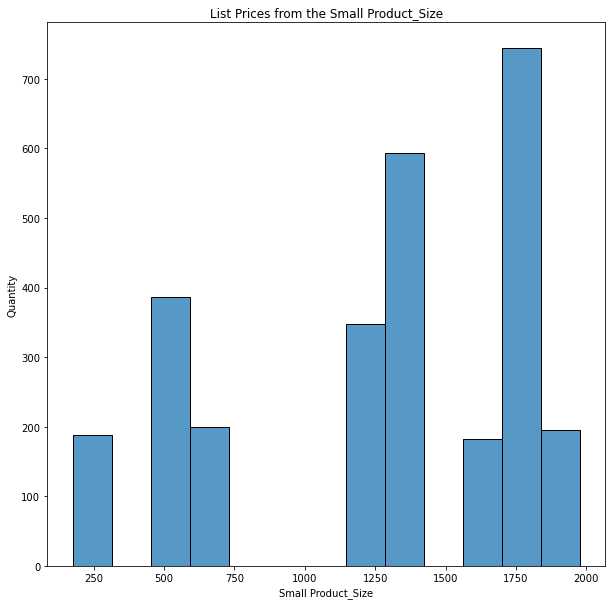

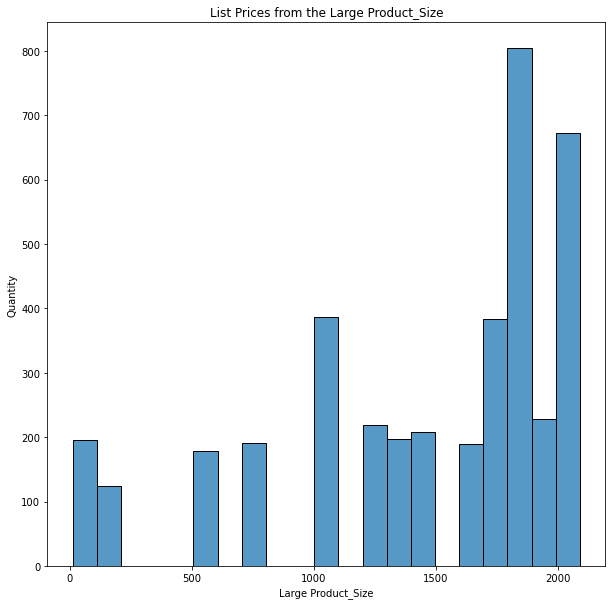

In [22]:
# exclude np.nan values for now
for ind in product:
    for i in df[ind].unique()[:-1]:
        data = df.loc[df[ind] == i, :]
        #plot
        fig, axes = plt.subplots(1, 1, figsize=(10,10))
        sns.histplot(data=data, x='list_price')
        plt.title(f'List Prices from the {i.title()} {ind.title()}')
        #set labels
        plt.xlabel(f'{i.title()} {ind.title()}')
        plt.ylabel('Quantity')
        plt.show()